Importing Basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import statsmodels.api as sm
import time
import warnings
warnings.filterwarnings("ignore")

Importing Datasets

In [ ]:
#reading csv file
df=pd.read_csv('/content/airline_passenger_satisfaction (2).csv',sep=',')

In [ ]:
df.head()  # Checking first 5 rows

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0  ...                 3             5                 2            5   
1  ...                 5             4                 5            5   
2  ...                 3             5                 3            5   
3  ...                 5             5                 5            4   
4  ...                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  
4                        3                 3                Satisfied  

[5 rows x 24 columns]

In [ ]:
df.head().T  # Better View

0          1  \
ID                                                            1          2   
Gender                                                     Male     Female   
Age                                                          48         35   
Customer Type                                        First-time  Returning   
Type of Travel                                         Business   Business   
Class                                                  Business   Business   
Flight Distance                                             821        821   
Departure Delay                                               2         26   
Arrival Delay                                               5.0       39.0   
Departure and Arrival Time Convenience                        3          2   
Ease of Online Booking                                        3          2   
Check-in Service                                              4          3   
Online Boarding                                               3          5   
Gate Location                                                 3          2   
On-board Service                                              3          5   
Seat Comfort                                                  5          4   
Leg Room Service                                              2          5   
Cleanliness                                                   5          5   
Food and Drink                                                5          3   
In-flight Service                                             5          5   
In-flight Wifi Service                                        3          2   
In-flight Entertainment                                       5          5   
Baggage Handling                                              5          5   
Satisfaction                            Neutral or Dissatisfied  Satisfied   

                                                2          3          4  
ID                                              3          4          5  
Gender                                       Male       Male     Female  
Age                                            41         50         49  
Customer Type                           Returning  Returning  Returning  
Type of Travel                           Business   Business   Business  
Class                                    Business   Business   Business  
Flight Distance                               853       1905       3470  
Departure Delay                                 0          0          0  
Arrival Delay                                 0.0        0.0        1.0  
Departure and Arrival Time Convenience          4          2          3  
Ease of Online Booking                          4          2          3  
Check-in Service                                4          3          3  
Online Boarding                                 5          4          5  
Gate Location                                   4          2          3  
On-board Service                                3          5          3  
Seat Comfort                                    5          5          4  
Leg Room Service                                3          5          4  
Cleanliness                                     5          4          5  
Food and Drink                                  5          4          4  
In-flight Service                               3          5          3  
In-flight Wifi Service                          4          2          3  
In-flight Entertainment                         3          5          3  
Baggage Handling                                3          5          3  
Satisfaction                            Satisfied  Satisfied  Satisfied

Data Exploration

In [ ]:
df.shape

(129880, 24)

Dataset has 129880 rows and 24 columns

In [ ]:
#information about number of rows and columns, data types, the number of non-null values,
#and the amount of memory used by the dataframe
# Drop unnecessary columns
df = df.drop('ID', axis=1)
# Check size of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [ ]:
# Check for missing values and giving total of missing values
#df.isna().sum()  or
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                            0
Satisfaction                                0
dtype: int64

In [ ]:
# Check for number of unique values

df.nunique()

Gender                                       2
Age                                         75
Customer Type                                2
Type of Travel                               2
Class                                        3
Flight Distance                           3821
Departure Delay                            466
Arrival Delay                              472
Departure and Arrival Time Convenience       6
Ease of Online Booking                       6
Check-in Service                             6
Online Boarding                              6
Gate Location                                6
On-board Service                             6
Seat Comfort                                 6
Leg Room Service                             6
Cleanliness                                  6
Food and Drink                               6
In-flight Service                            6
In-flight Wifi Service                       6
In-flight Entertainment                      6
Baggage Handling                             5
Satisfaction                                 2
dtype: int64

In [ ]:
# Statistical Information

df.describe().T

count         mean         std  \
Age                                     129880.0    39.427957   15.119360   
Flight Distance                         129880.0  1190.316392  997.452477   
Departure Delay                         129880.0    14.713713   38.071126   
Arrival Delay                           129487.0    15.091129   38.465650   
Departure and Arrival Time Convenience  129880.0     3.057599    1.526741   
Ease of Online Booking                  129880.0     2.756876    1.401740   
Check-in Service                        129880.0     3.306267    1.266185   
Online Boarding                         129880.0     3.252633    1.350719   
Gate Location                           129880.0     2.976925    1.278520   
On-board Service                        129880.0     3.383023    1.287099   
Seat Comfort                            129880.0     3.441361    1.319289   
Leg Room Service                        129880.0     3.350878    1.316252   
Cleanliness                             129880.0     3.286326    1.313682   
Food and Drink                          129880.0     3.204774    1.329933   
In-flight Service                       129880.0     3.642193    1.176669   
In-flight Wifi Service                  129880.0     2.728696    1.329340   
In-flight Entertainment                 129880.0     3.358077    1.334049   
Baggage Handling                        129880.0     3.632114    1.180025   

                                         min    25%    50%     75%     max  
Age                                      7.0   27.0   40.0    51.0    85.0  
Flight Distance                         31.0  414.0  844.0  1744.0  4983.0  
Departure Delay                          0.0    0.0    0.0    12.0  1592.0  
Arrival Delay                            0.0    0.0    0.0    13.0  1584.0  
Departure and Arrival Time Convenience   0.0    2.0    3.0     4.0     5.0  
Ease of Online Booking                   0.0    2.0    3.0     4.0     5.0  
Check-in Service                         0.0    3.0    3.0     4.0     5.0  
Online Boarding                          0.0    2.0    3.0     4.0     5.0  
Gate Location                            0.0    2.0    3.0     4.0     5.0  
On-board Service                         0.0    2.0    4.0     4.0     5.0  
Seat Comfort                             0.0    2.0    4.0     5.0     5.0  
Leg Room Service                         0.0    2.0    4.0     4.0     5.0  
Cleanliness                              0.0    2.0    3.0     4.0     5.0  
Food and Drink                           0.0    2.0    3.0     4.0     5.0  
In-flight Service                        0.0    3.0    4.0     5.0     5.0  
In-flight Wifi Service                   0.0    2.0    3.0     4.0     5.0  
In-flight Entertainment                  0.0    2.0    4.0     4.0     5.0  
Baggage Handling                         1.0    3.0    4.0     5.0     5.0

some basic statistical information about passengers and their flight details:

1.The average age of the passengers is 39, where the minimum age being 7 and maximum 85.

2.The average flight travel distance is 1189 miles, where the minimum flight distance being 31 and maximum 4893.

3.The mean values for the customer input categories are either 2 or 3.

VISUALIZATION AND FINDING PATTERNS

In [ ]:
# Visualisation Setup

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# How many of each class are there in target column?
df["Satisfaction"].value_counts()

Satisfaction
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: count, dtype: int64

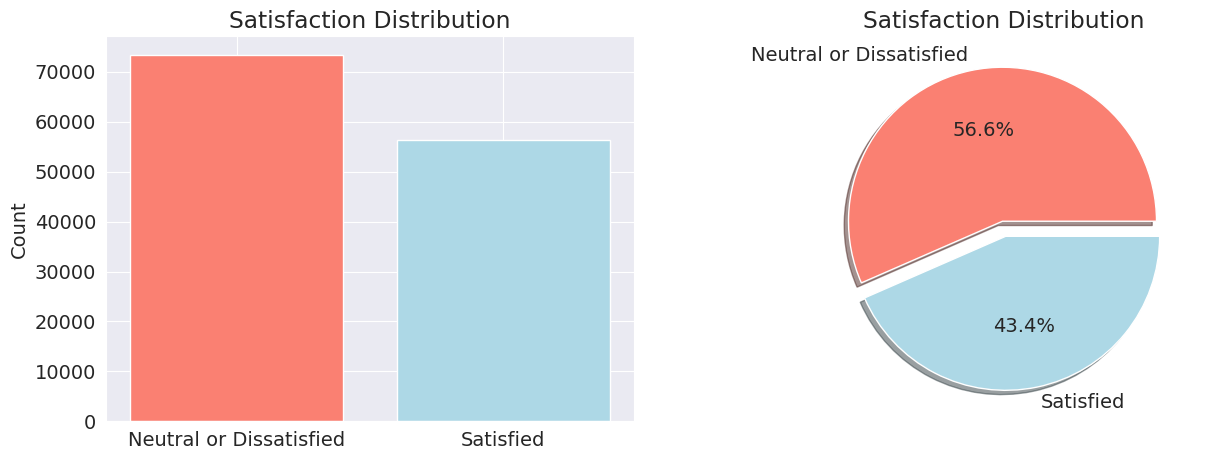

In [ ]:
# Visualising the satisfation distribution among passengers
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,5))

# Plot 1
ax1.bar(df["Satisfaction"].value_counts().index, df["Satisfaction"].value_counts(),color=["salmon", "lightblue"])
ax1.set(title="Satisfaction Distribution",ylabel="Count")

# Plot 2
ax2.pie(df["Satisfaction"].value_counts(),colors=["salmon", "lightblue"],
        labels= ["Neutral or Dissatisfied", "Satisfied"] ,
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Satisfaction Distribution");

1. Customer Satisfaction variation with respect to age

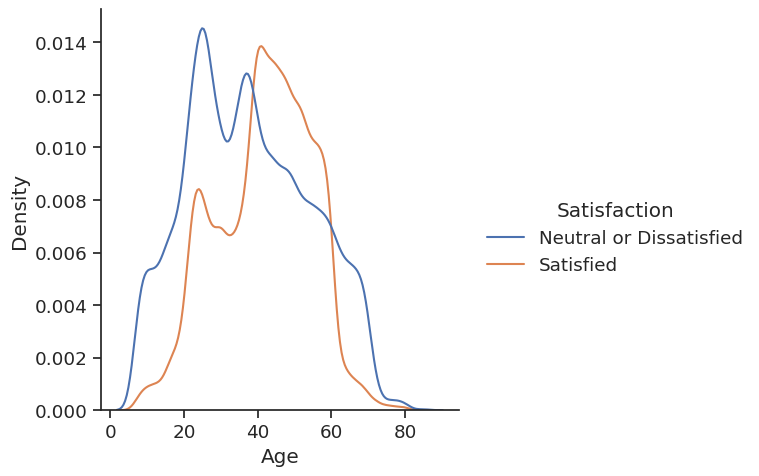

In [ ]:
# Focus on interesting features
focus_features = ['Age']

sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(focus_features):
    sns.displot(data=df, x=feature, kind='kde', hue='Satisfaction')

sns.despine()

In [ ]:
px.histogram(df, x='Age', title='Age vs Satisfaction Ratio', marginal='box', color='Satisfaction')

most of data is distributed normally and has very few outliers.

2. Customer Satisfaction Ratio with respect to Sex

In [ ]:
# Sex ratio of Male and Female

df['Gender'].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

Satisfaction  Neutral or Dissatisfied  Satisfied
Gender                                          
Female                          37630      28269
Male                            35822      28159


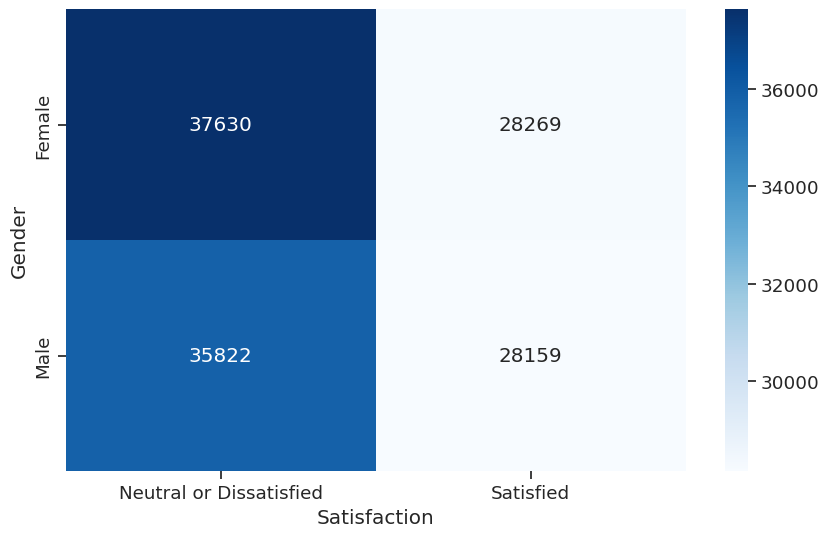

In [ ]:
# Compare target column with sex column
print(pd.crosstab(df['Gender'], df['Satisfaction']))

# Visualise this crosstabulated data
sns.heatmap(pd.crosstab(df['Gender'], df['Satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [ ]:
# Check the percentages

pd.crosstab(df['Gender'], df['Satisfaction'], normalize=True)*100

Satisfaction  Neutral or Dissatisfied  Satisfied
Gender                                          
Female                      28.972898  21.765476
Male                        27.580844  21.680782

57% of passengers are not satisfied with the Airline Services

3. Customer Satisfaction Ratio with respect to Customer Type

In [ ]:
# Customer Type Ratio
df['Customer Type'].value_counts()

Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64

Satisfaction   Neutral or Dissatisfied  Satisfied
Customer Type                                    
First-time                       18080       5700
Returning                        55372      50728


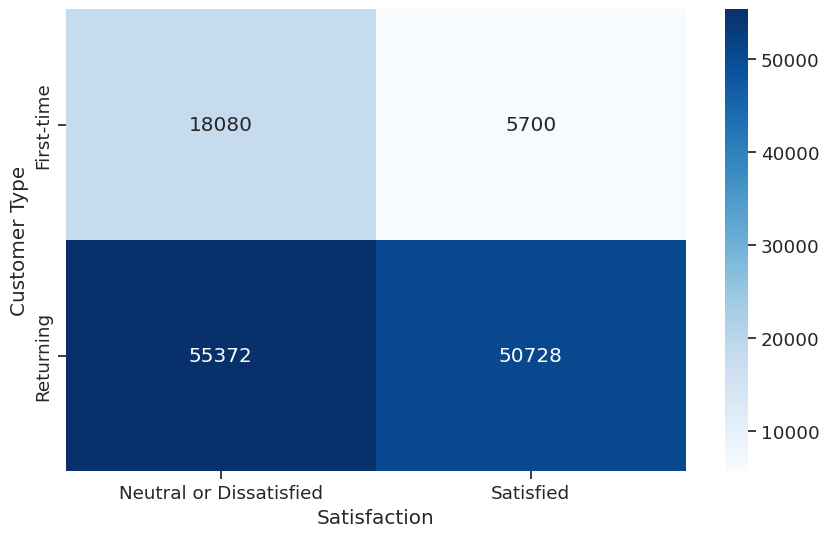

In [ ]:
# Crosstab Data
print(pd.crosstab(df['Customer Type'], df['Satisfaction']))
# Visualise this crosstabulated data
sns.heatmap(pd.crosstab(df['Customer Type'], df['Satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [ ]:
# Check the percentages

pd.crosstab(df['Customer Type'], df['Satisfaction'], normalize=True)*100

Satisfaction   Neutral or Dissatisfied  Satisfied
Customer Type                                    
First-time                   13.920542   4.388666
Returning                    42.633200  39.057592

around 82% of the customers are Loyal Customers or returning customers out of which 43% are not satisfied with the services

4. Customer Satisfaction variation with respect to Type of Travel

In [ ]:
# Type of Travel Ratio
df['Type of Travel'].value_counts()

Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64

Satisfaction    Neutral or Dissatisfied  Satisfied
Type of Travel                                    
Business                          37337      52356
Personal                          36115       4072


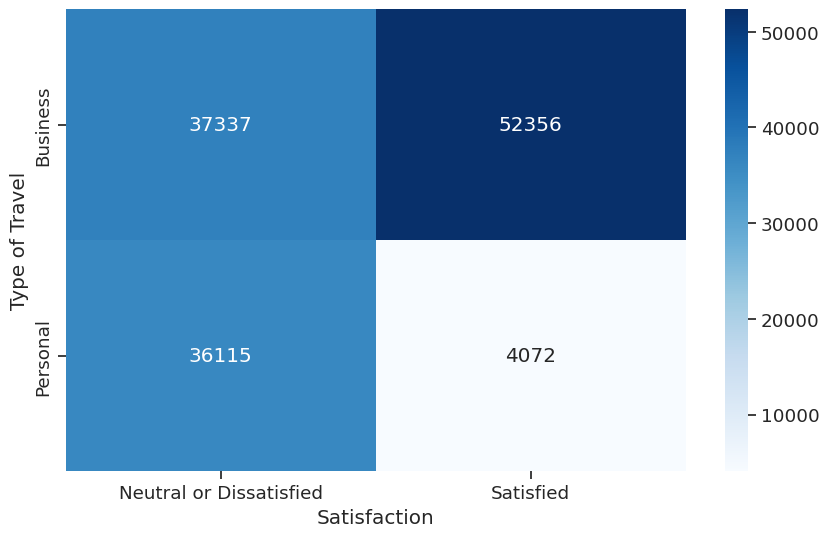

In [ ]:
# Crosstab Data
print(pd.crosstab(df['Type of Travel'], df['Satisfaction']))
# Visualise this crosstab data
sns.heatmap(pd.crosstab(df['Type of Travel'], df['Satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [ ]:
# Check the percentages
pd.crosstab(df['Type of Travel'], df['Satisfaction'], normalize=True)*100

Satisfaction    Neutral or Dissatisfied  Satisfied
Type of Travel                                    
Business                      28.747305  40.311056
Personal                      27.806437   3.135202

1. 69% of travel was done for Business out of which 40% of the customers were satisfied.

2. Most of the customer (90%) travelling for personal travel are unsatisfied with the services.

5. Customer Satisfaction variation with respect to Class

In [ ]:
# Type of Class Ratio
df['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

Satisfaction  Neutral or Dissatisfied  Satisfied
Class                                           
Business                        18994      43166
Economy                         47366      10943
Economy Plus                     7092       2319


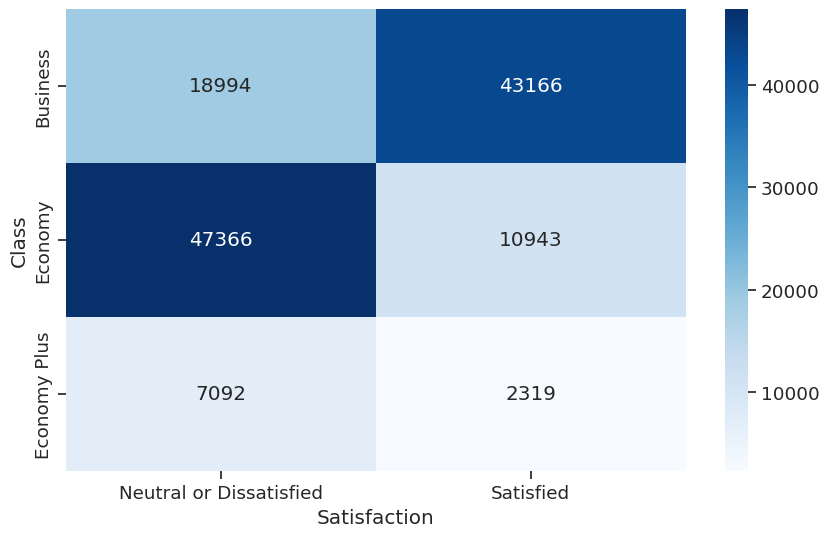

In [ ]:
# Crosstab Data
print(pd.crosstab(df['Class'], df['Satisfaction']))
# Visualise this crosstab data
sns.heatmap(pd.crosstab(df['Class'], df['Satisfaction']),annot=True, cmap='Blues', cbar=True, fmt="d");

In [ ]:
# Check the percentages
pd.crosstab(df['Class'], df['Satisfaction'], normalize=True)*100

Satisfaction  Neutral or Dissatisfied  Satisfied
Class                                           
Business                    14.624269  33.235294
Economy                     36.469048   8.425470
Economy Plus                 5.460425   1.785494

1.  50% passengers belong to Business Class, 50% belongs to Eco and Eco Plus Class.

2.  Majorlity of the customers belonging to Eco and Eco Plus are not satisfied with the services.

3.  Majority of the customers from Business Class are satisfied with the services.

6. Customer Satisfaction variation with respect to Customer Input

In [ ]:
customer_input_list = ['In-flight Wifi Service',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Gate Location', 'Food and Drink', 'Online Boarding', 'Seat Comfort',
       'In-flight Entertainment', 'On-board Service', 'Leg Room Service',
       'Baggage Handling', 'Check-in Service', 'In-flight Service',
       'Cleanliness']

In [ ]:
def plot_func(a,b):
    for category in customer_input_list[a:b]:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        sns.countplot(x=df[category],palette="Pastel1")

        plt.subplot(1,2,2)
        sns.countplot(x=df[category],hue=df['Satisfaction'], palette='Blues')
        plt.show()

For first three category

1. Inflight wifi service

2. Departure/Arrival time convenient

3. Ease of Online booking

4. Gate location

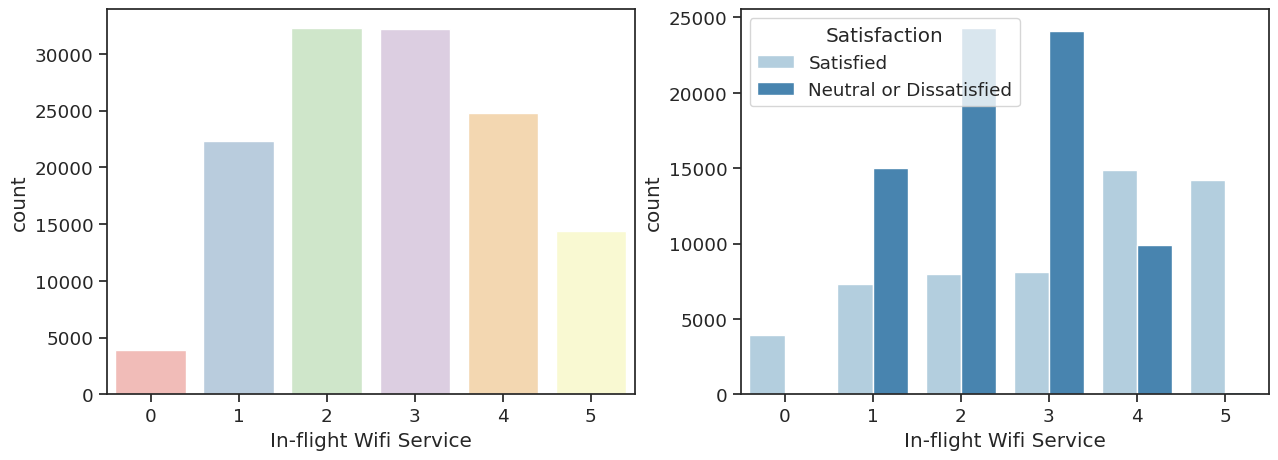

In [ ]:
#In-flight wifi service
plot_func(0,1)

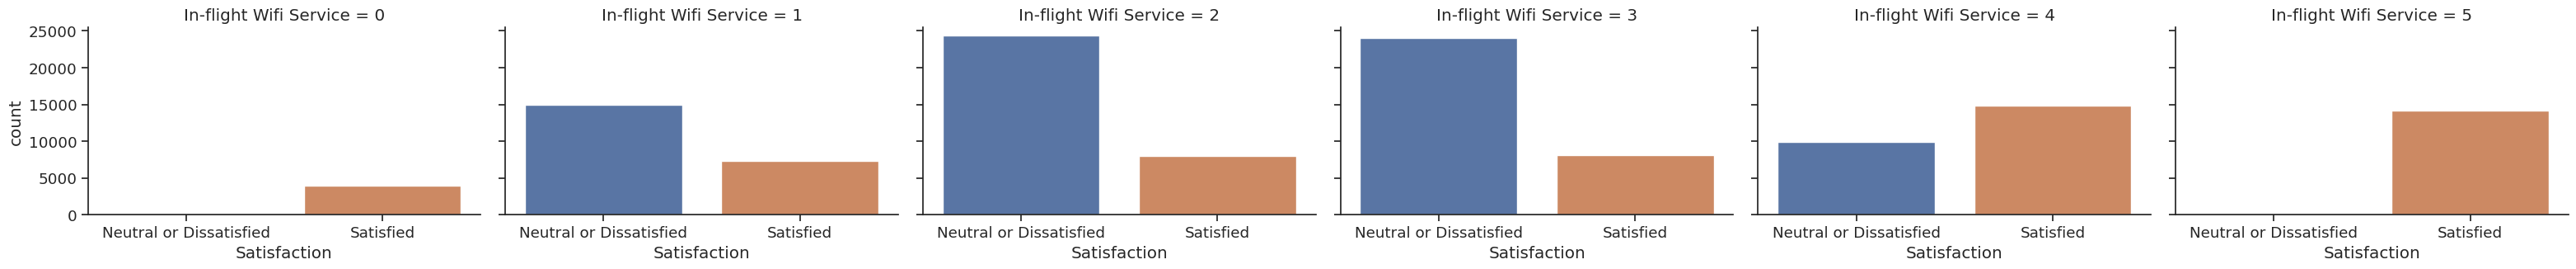

In [ ]:
#Inflight wifi service
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="In-flight Wifi Service", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

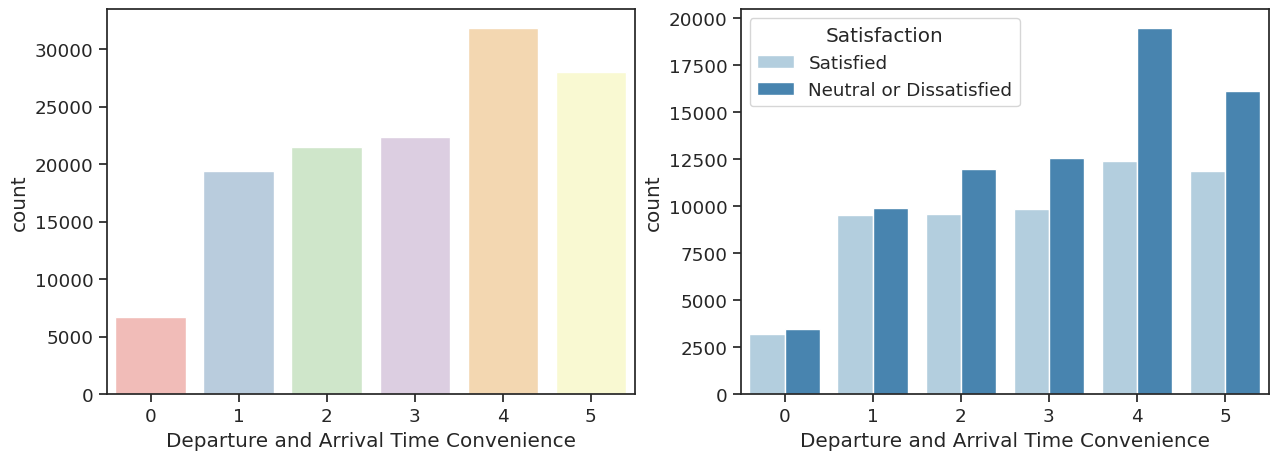

In [ ]:
#Departure and Arrival Time Convenience
plot_func(1,2)

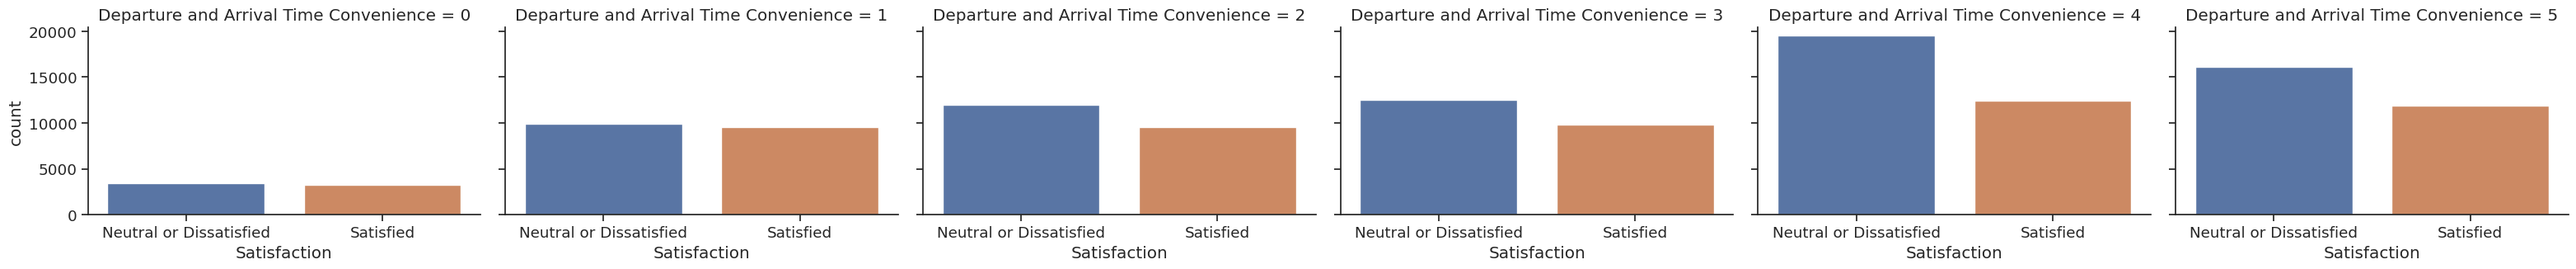

In [ ]:
# Departure and Arrival Time Convenience
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Departure and Arrival Time Convenience", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

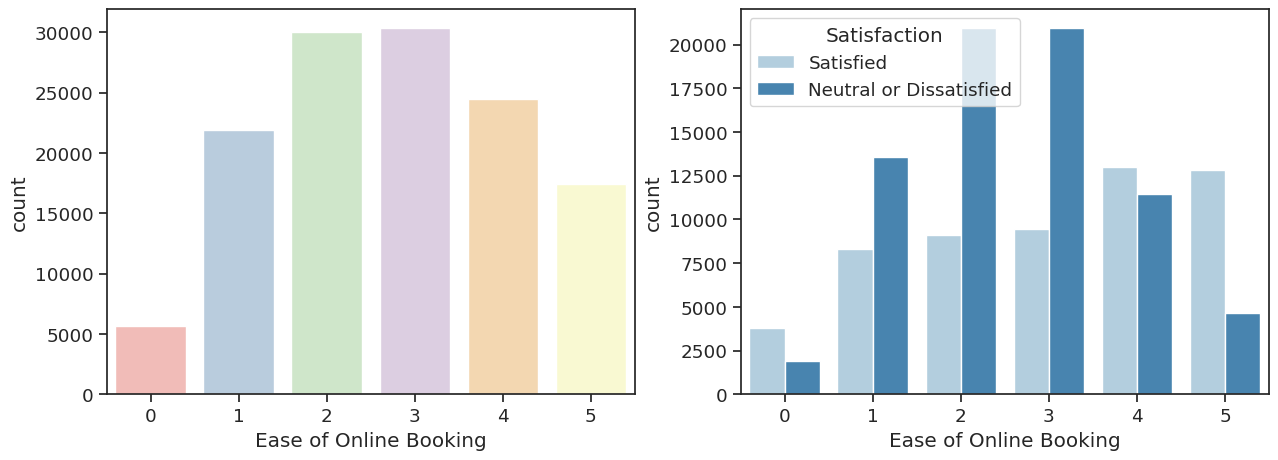

In [ ]:
# Ease of Online Booking
plot_func(2,3)

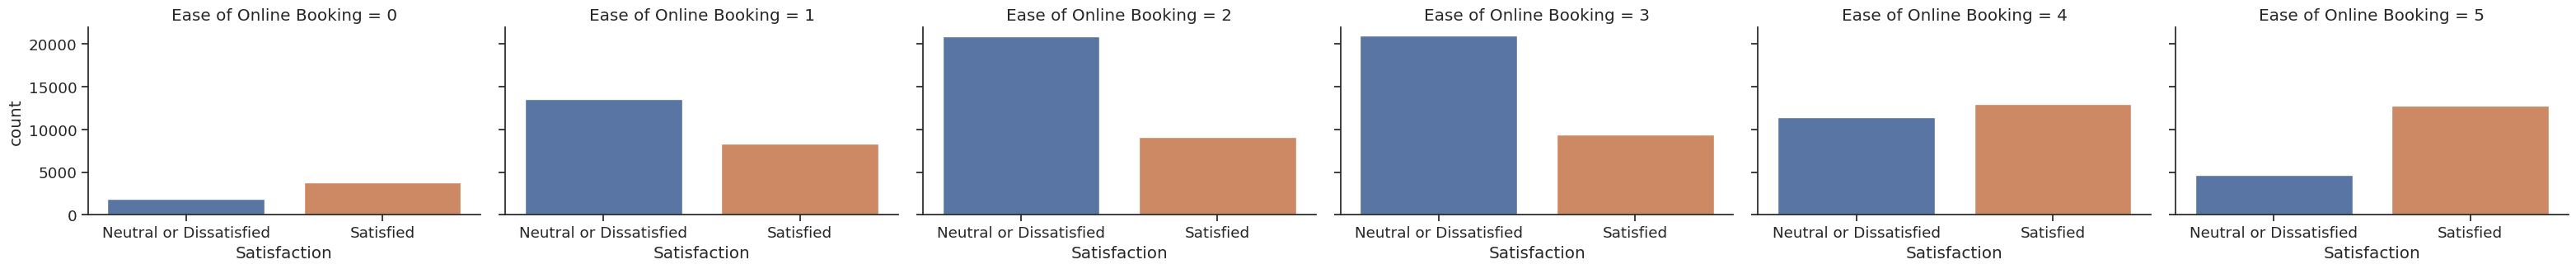

In [ ]:
# Ease of Online Booking
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Ease of Online Booking", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

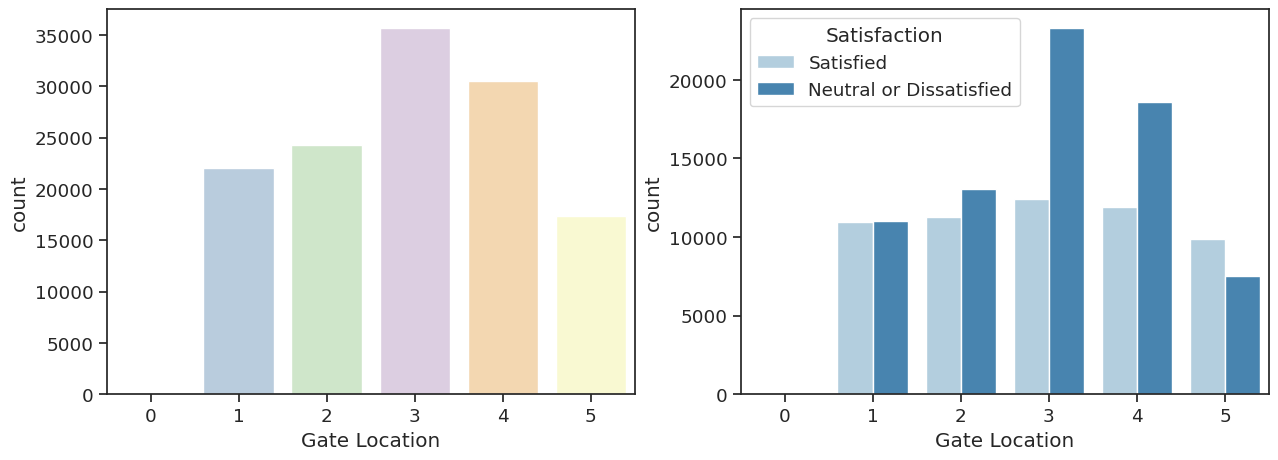

In [ ]:
#Gate Location
plot_func(3,4)

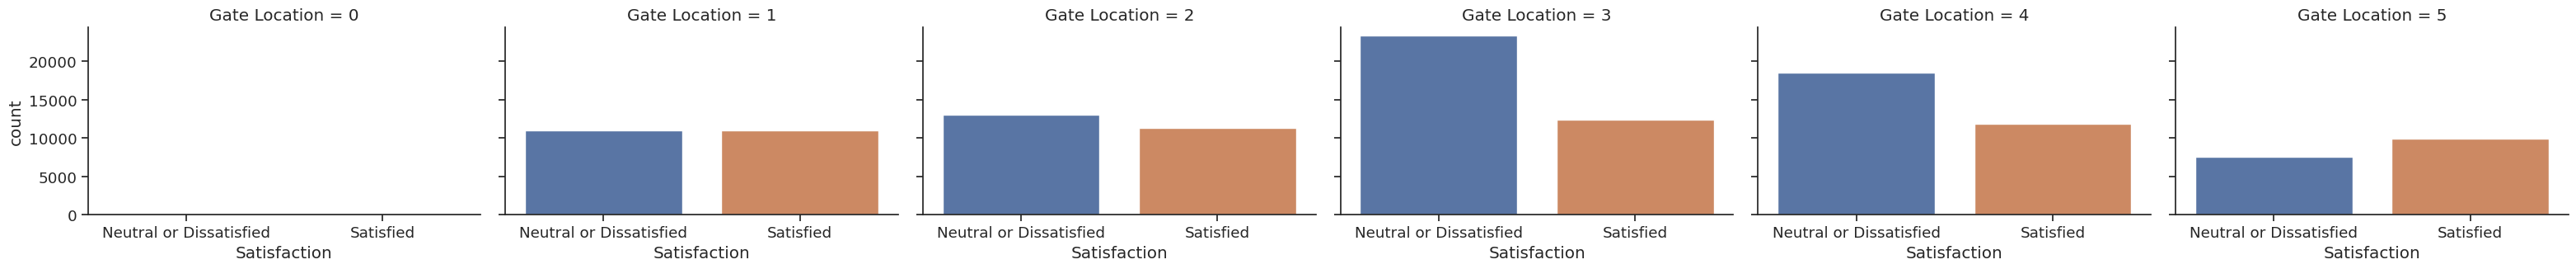

In [ ]:
# Gate Location
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Gate Location", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

For Next Four Category

1. Food and drink

2. Online boarding

3. Seat comfort

4. In-flight Entertainment

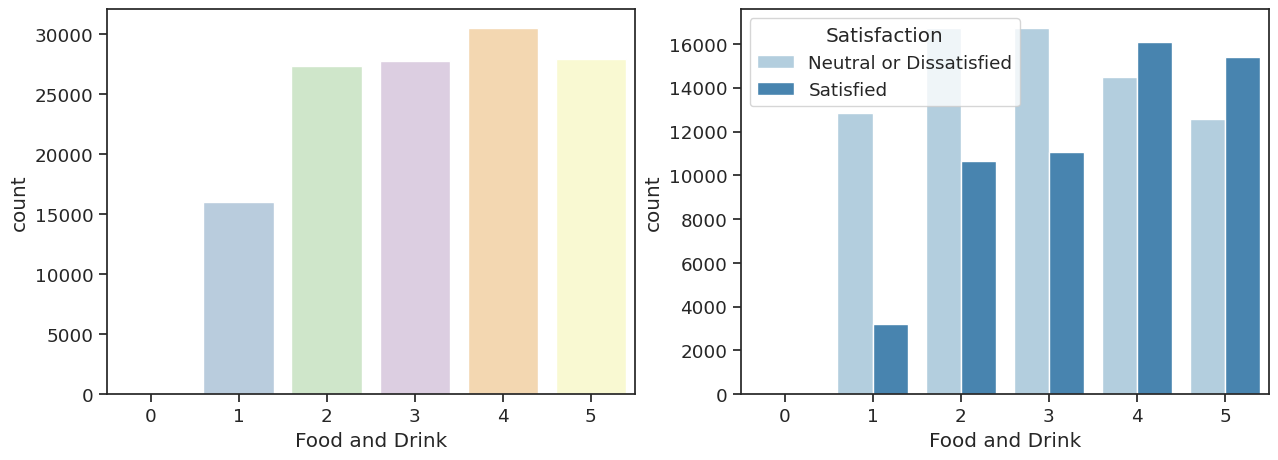

In [ ]:
# Food and drink
plot_func(4,5)

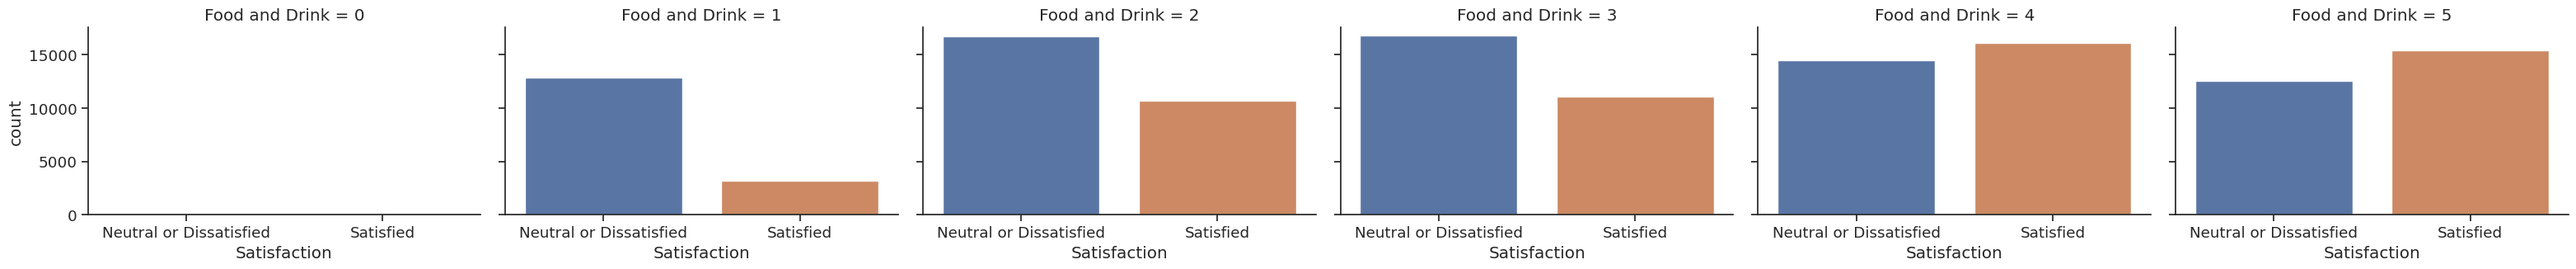

In [ ]:
# Food and drink
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Food and Drink", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

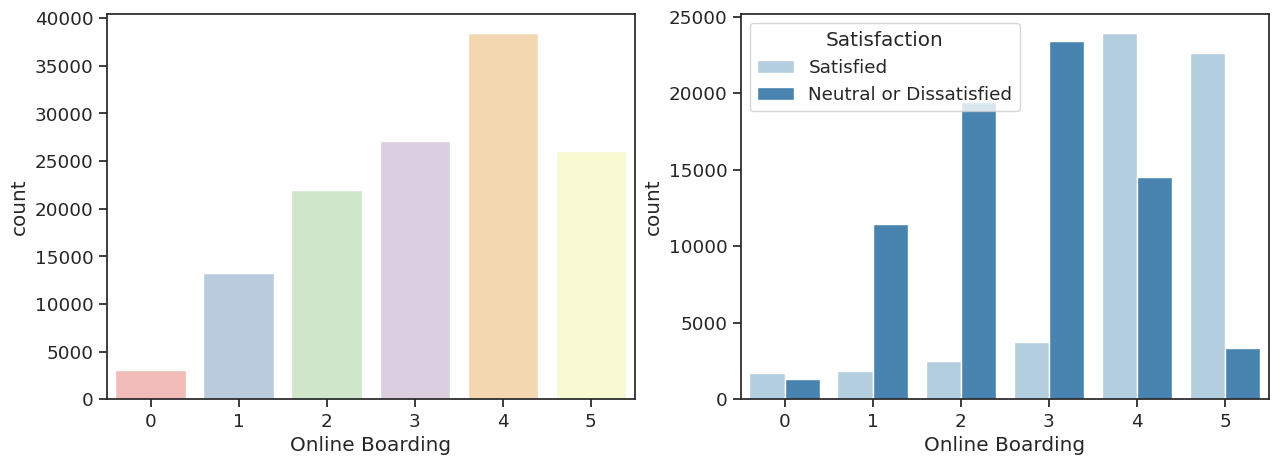

In [ ]:
# Online boarding
plot_func(5,6)

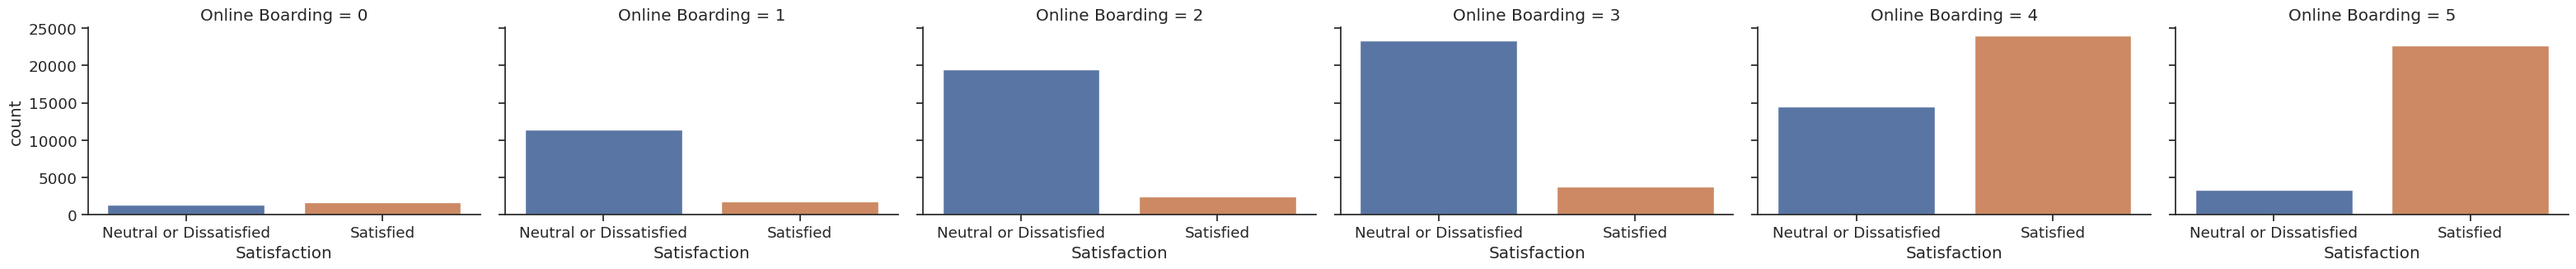

In [ ]:
# Online boarding
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Online Boarding", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

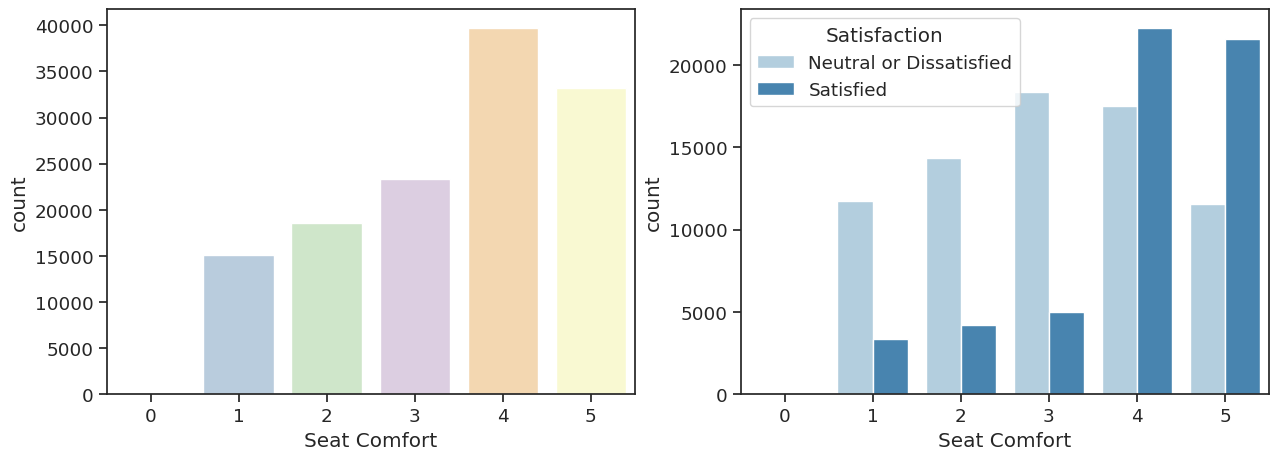

In [ ]:
# Seat Comfort
plot_func(6,7)

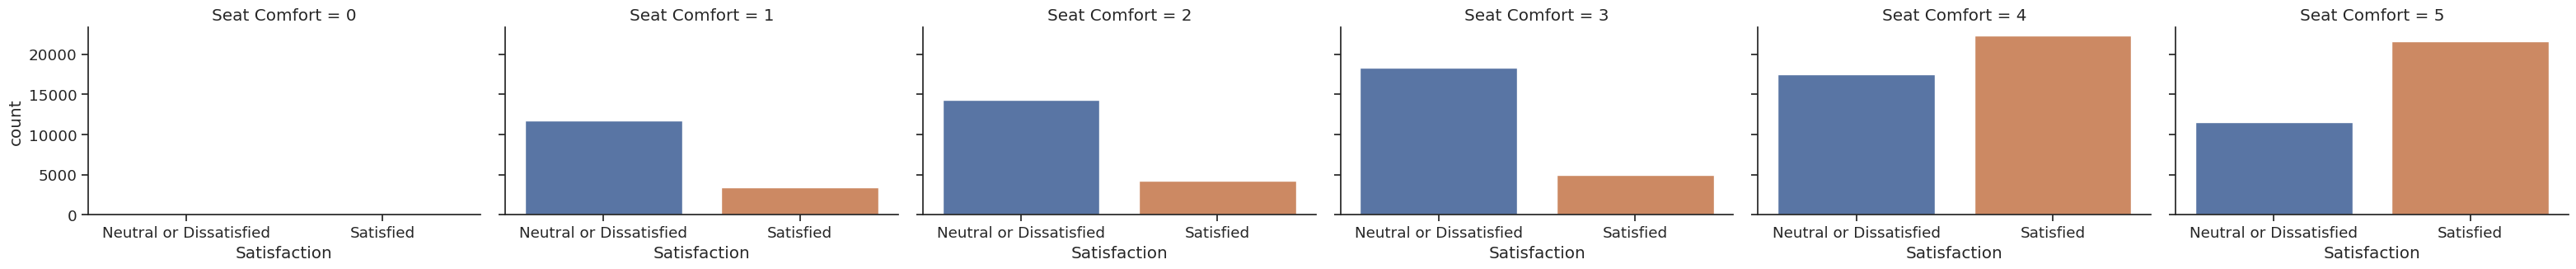

In [ ]:
# Seat Comfort
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Seat Comfort", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

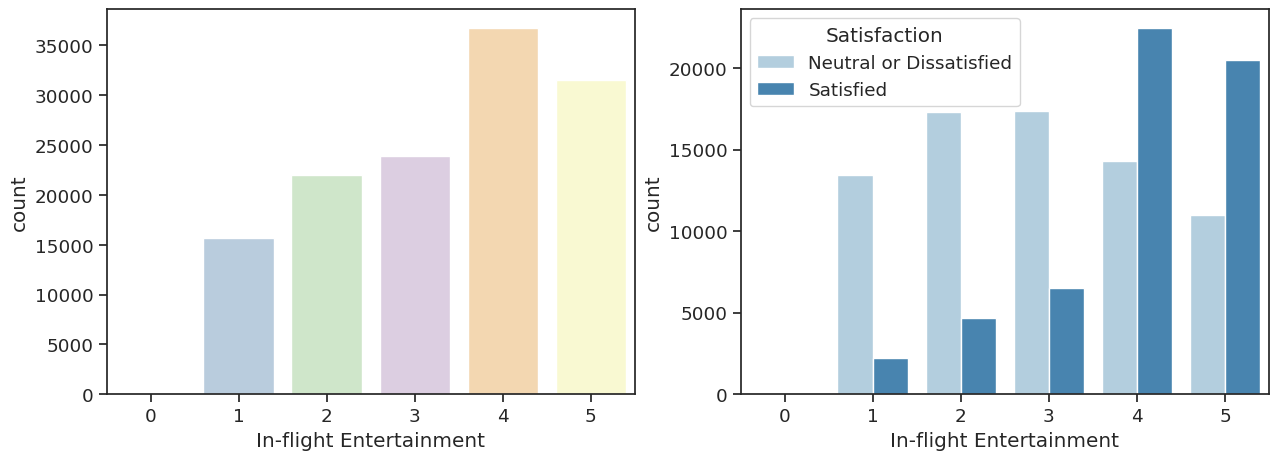

In [ ]:
# In-flight Entertainment
plot_func(7,8)

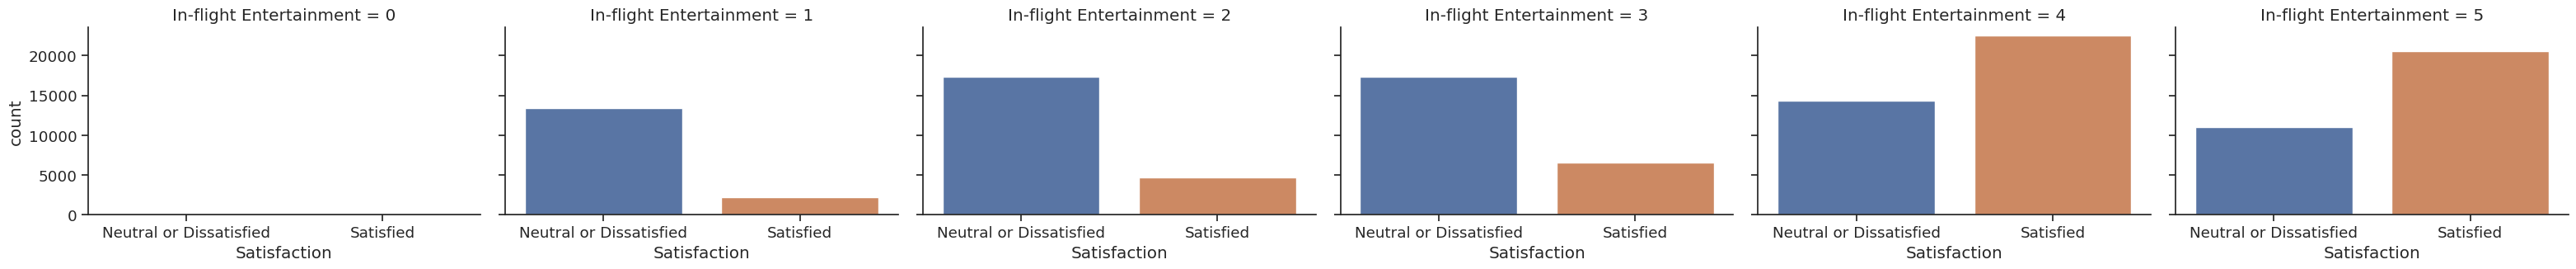

In [ ]:
# In-flight Entertainment
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="In-flight Entertainment", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

For Next Four Category

1. On-board service

2. Leg room service

3. Baggage handling

4. Checkin service

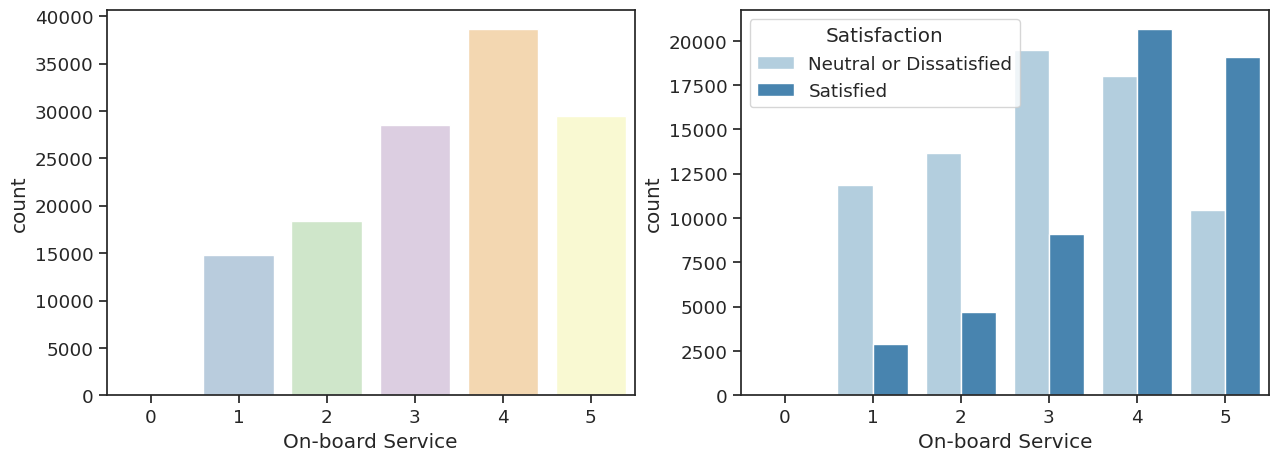

In [ ]:
# On-board Service
plot_func(8,9)

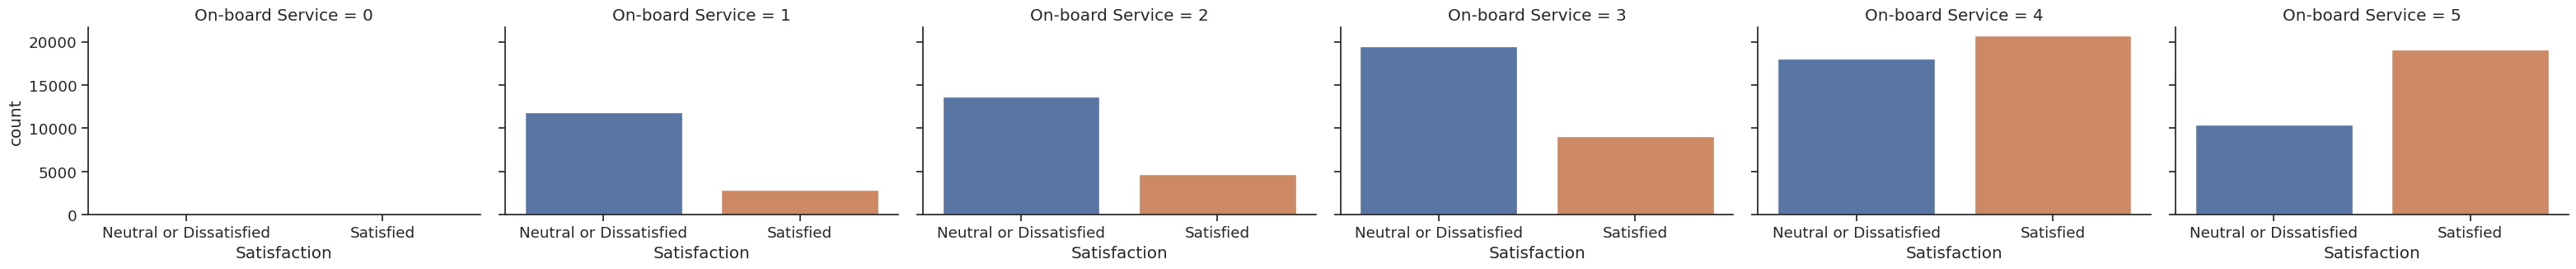

In [ ]:
# On-board Service
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="On-board Service", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

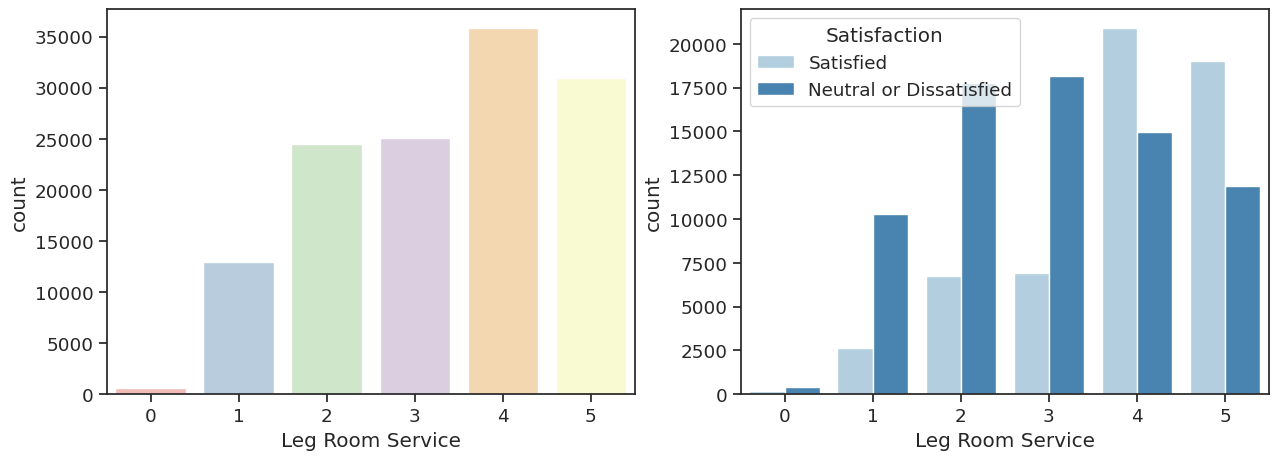

In [ ]:
#Leg Room Service
plot_func(9,10)

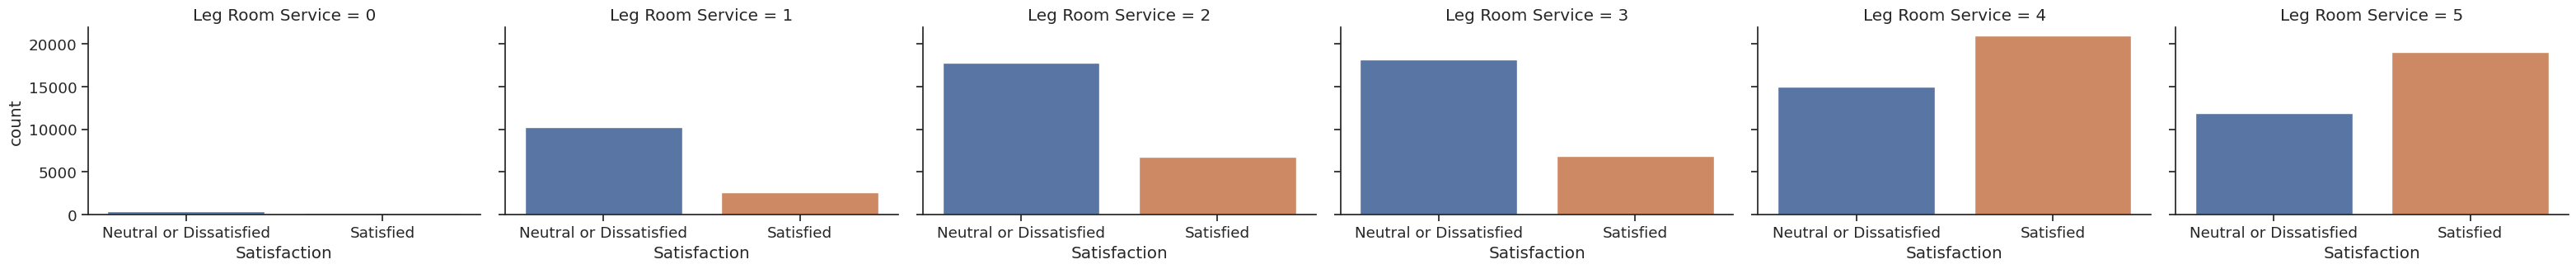

In [ ]:
# Leg Room Service
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Leg Room Service", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

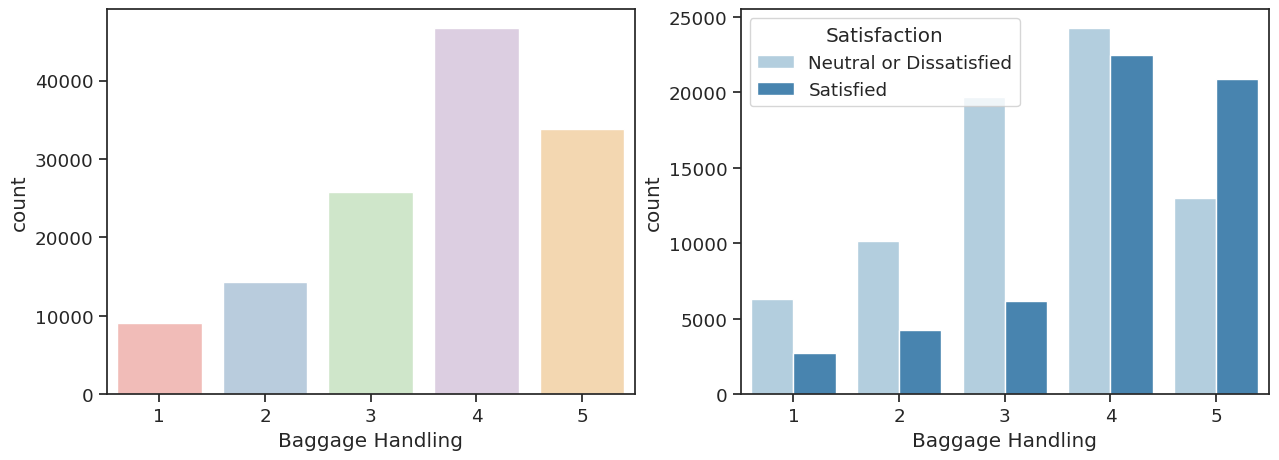

In [ ]:
# Baggage Handling
plot_func(10,11)

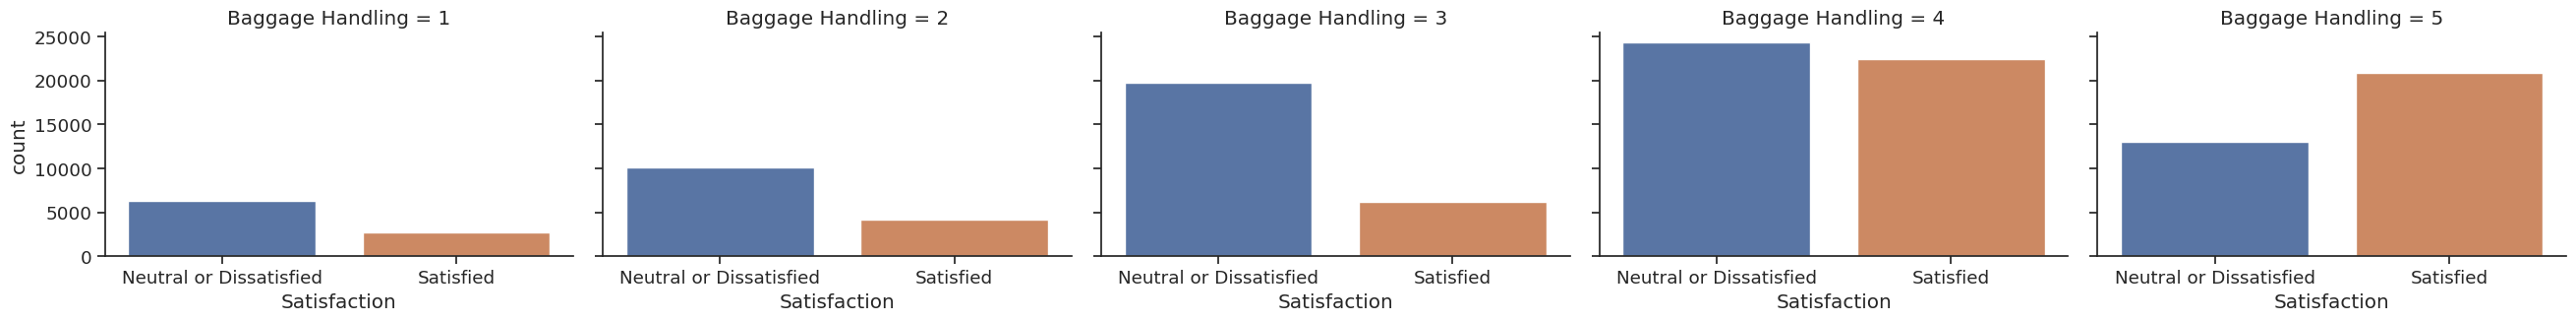

In [ ]:
# Baggage Handling
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Baggage Handling", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

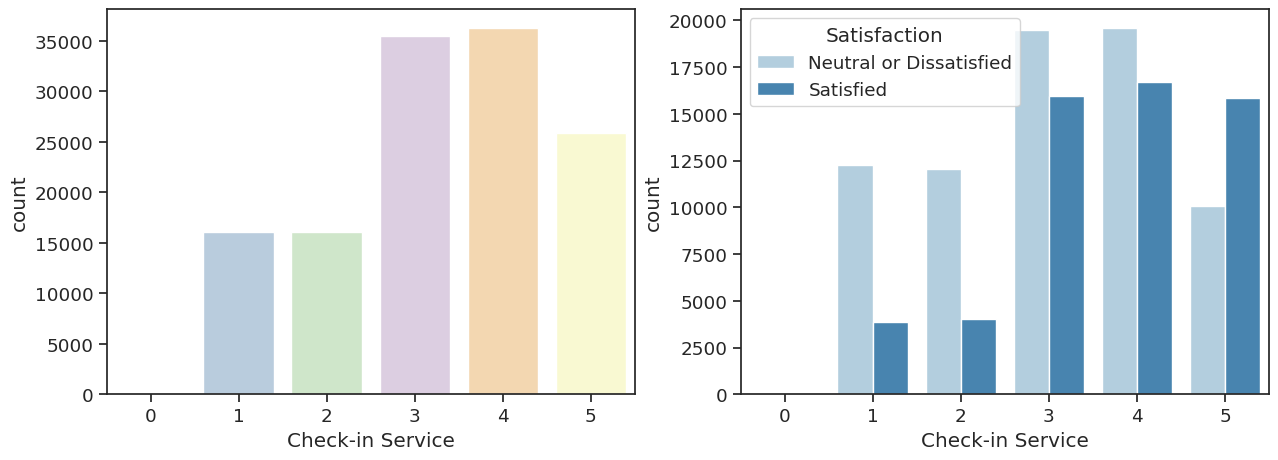

In [ ]:
# Check-in Service
plot_func(11,12)

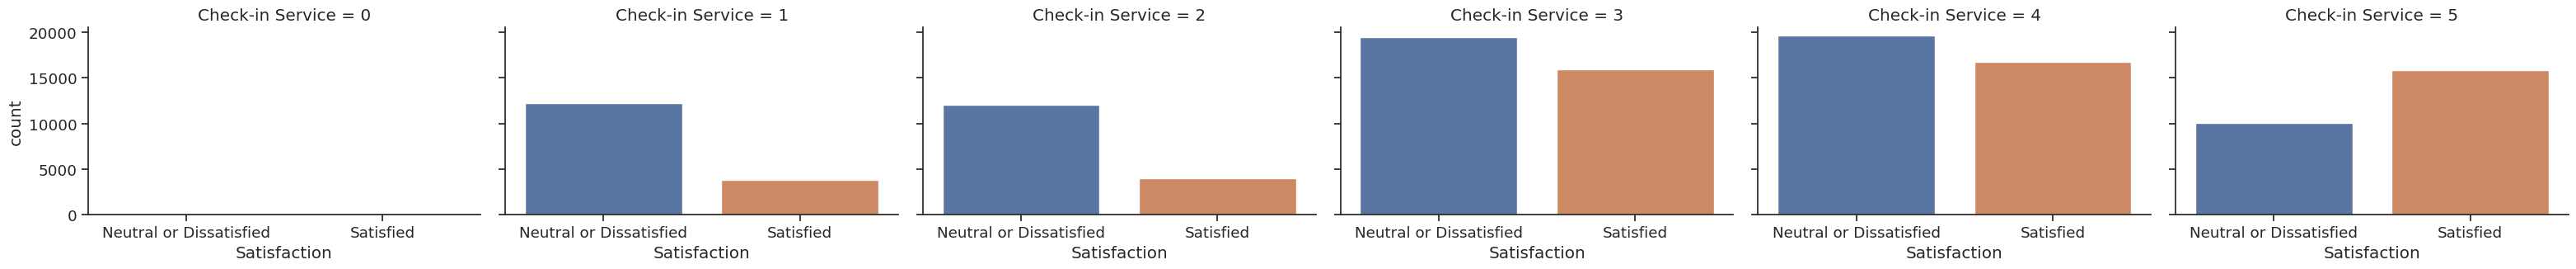

In [ ]:
# Check-in Service
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Check-in Service", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

 For Last Two Category

1. Inflight service

2. Cleanliness

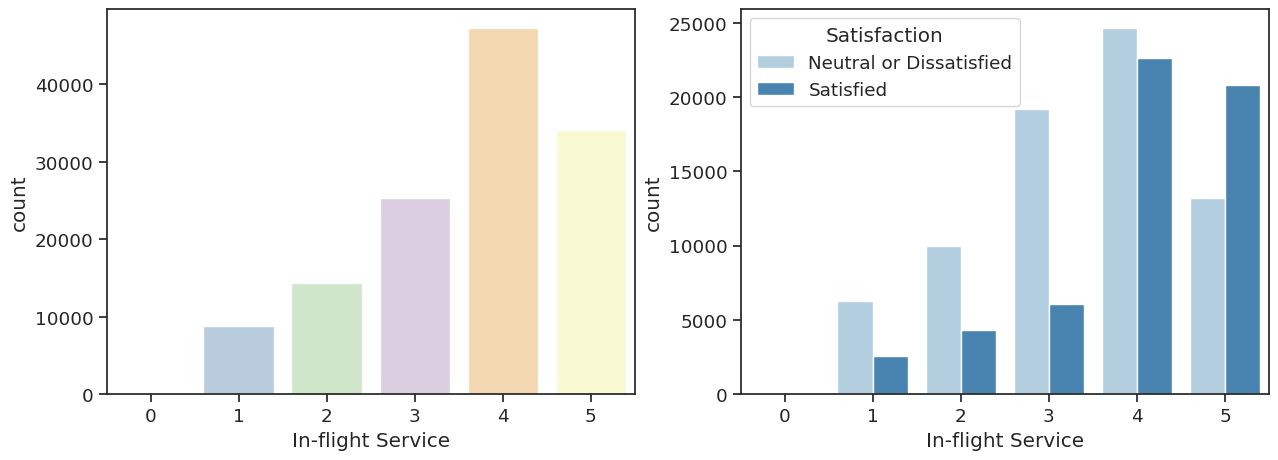

In [ ]:
# In-flight service
plot_func(12,13)

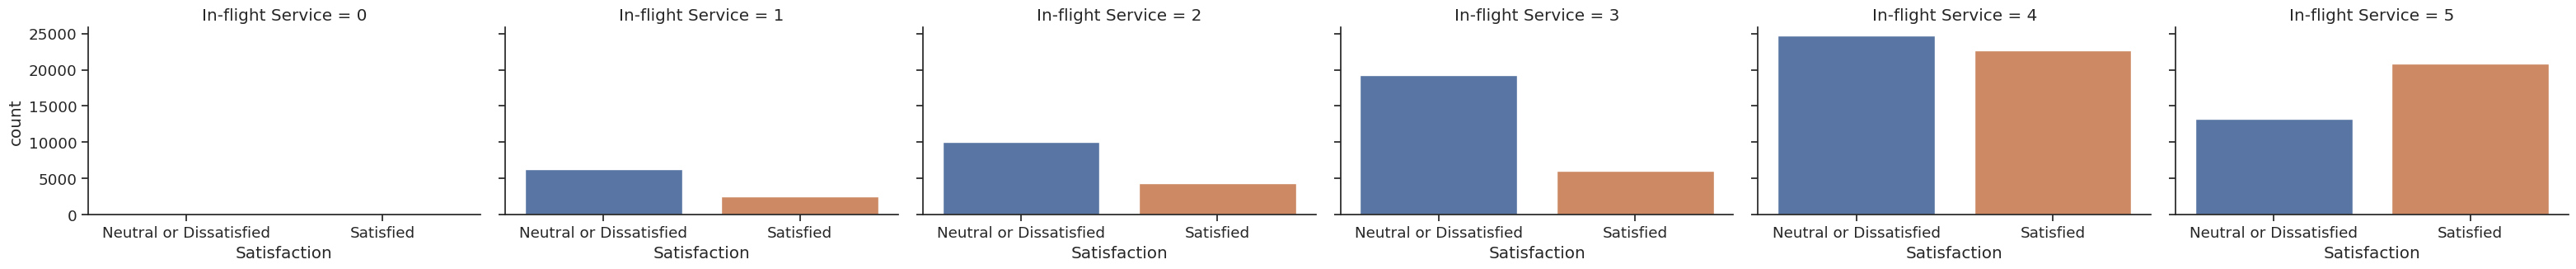

In [ ]:
# In-flight service
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="In-flight Service", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

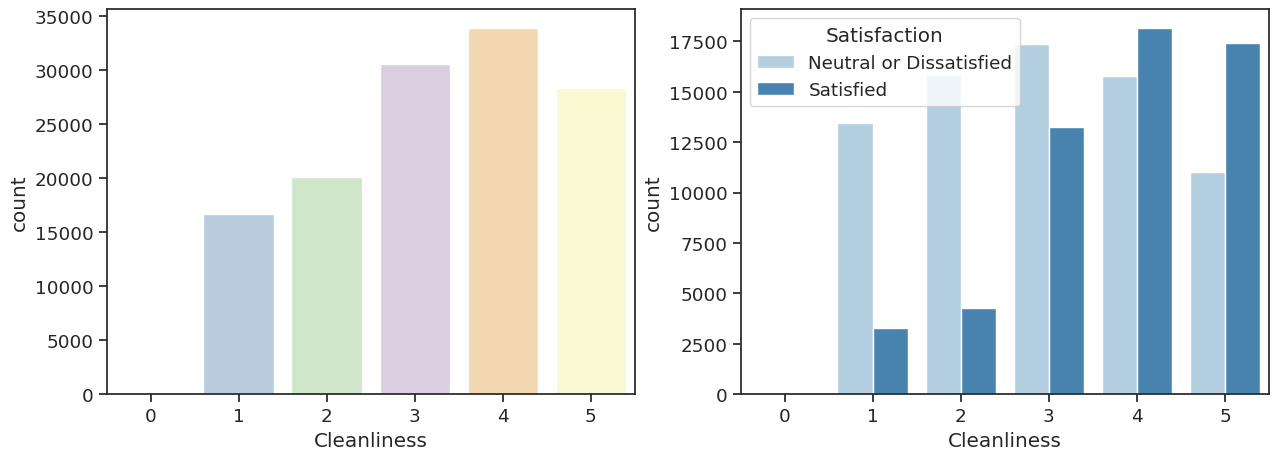

In [ ]:
#Cleanliness
plot_func(13,14)


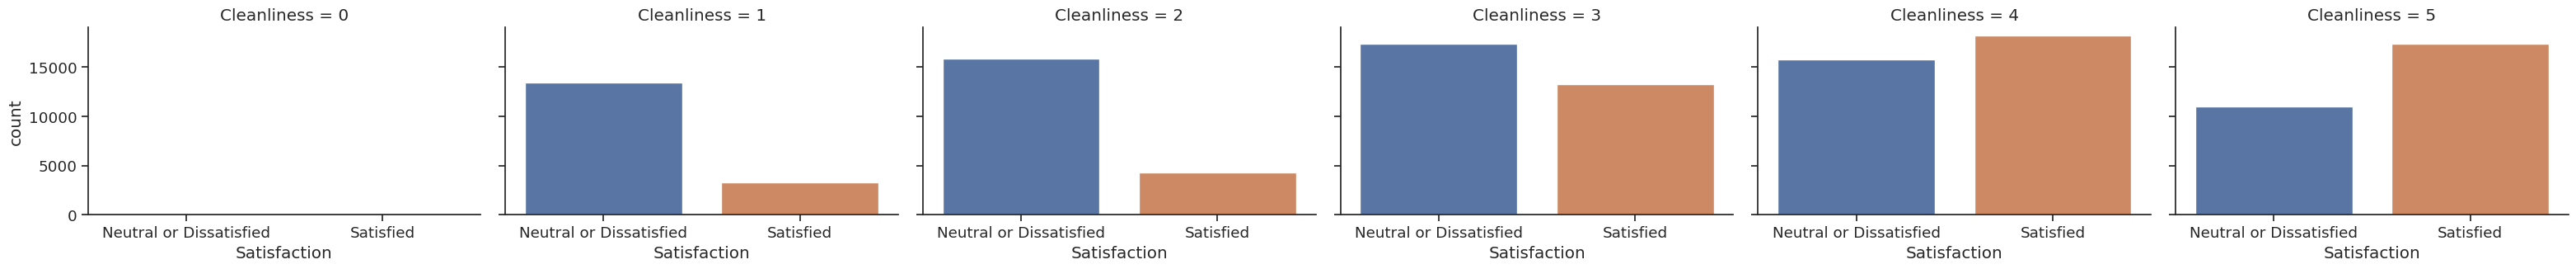

In [ ]:
#Cleanliness
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Cleanliness", hue="Satisfaction",col_wrap=6, data=df ,kind="count", height=3.5, aspect=1.5)

Customer Satisfaction variation with respect to Arrival/Departure Delay

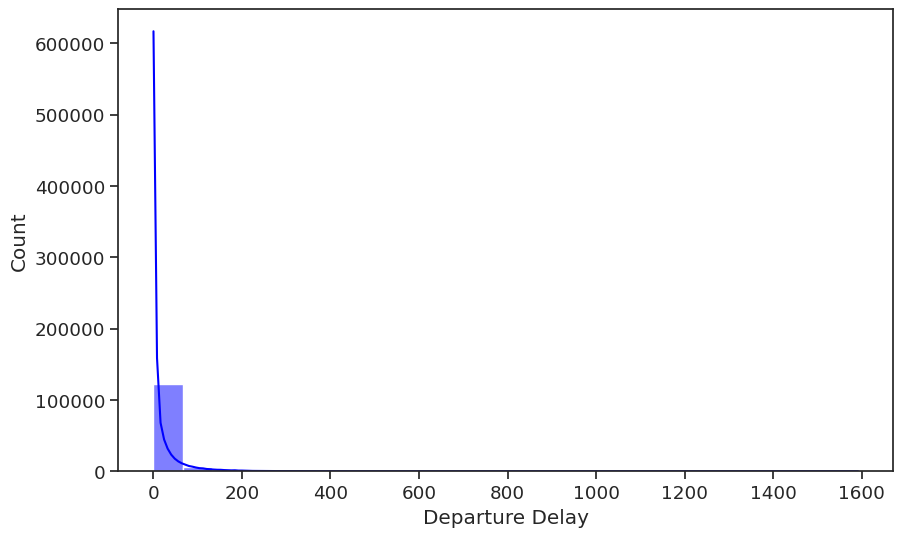

In [ ]:
# For Departure Delay

sns.histplot(df["Departure Delay"], bins=24,kde=True, color="blue");

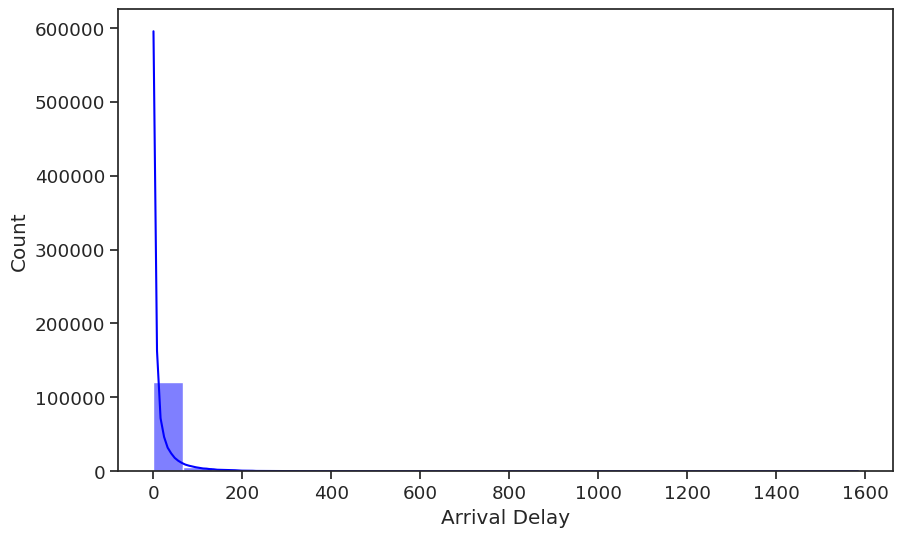

In [ ]:
#For Arrival Delay

sns.histplot(df["Arrival Delay"], bins=24,kde=True, color="blue");

From the above two graphs we can infer that there a lot of outliers in them, so we have to keep this in mind while imputing for missing values. We also need to normalise the columns so it won't have very high impact on the ML algorithm.

Exploratory Data Analysis

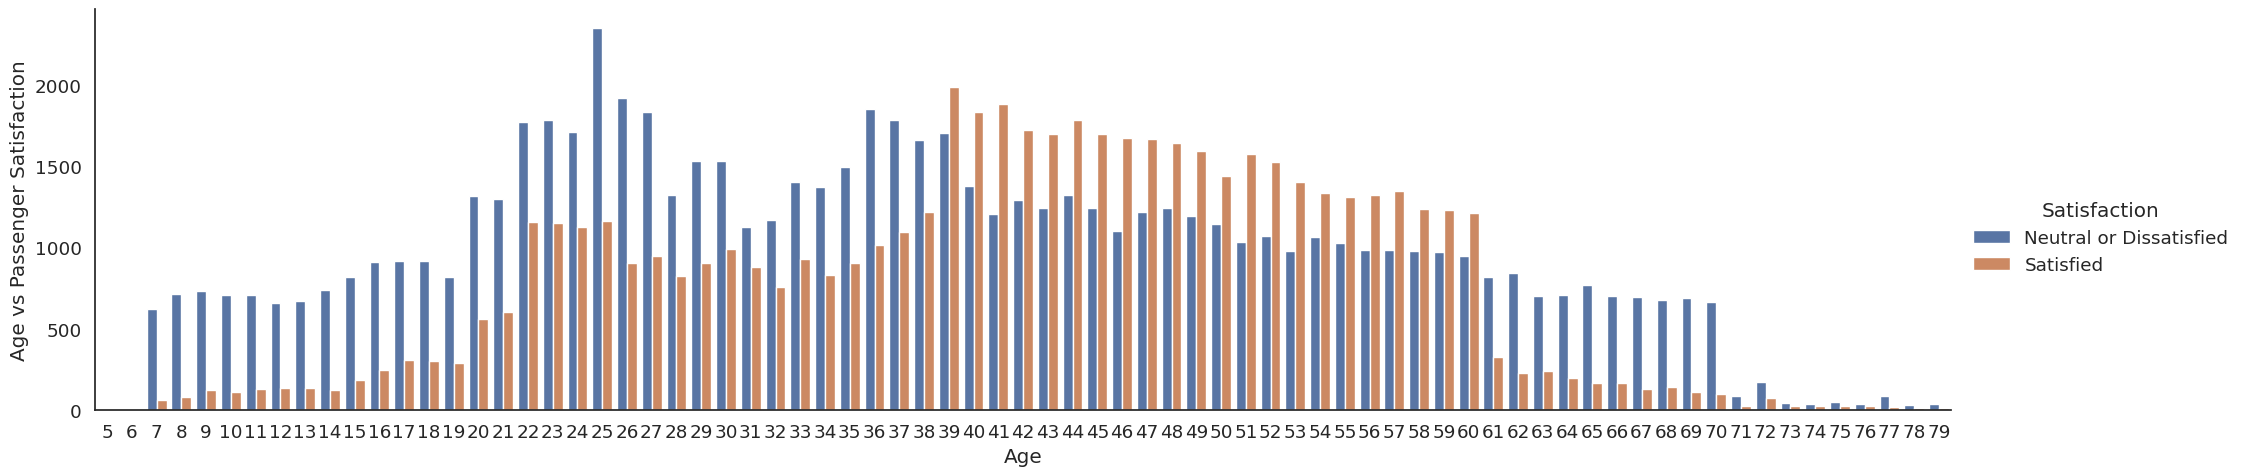

In [ ]:
# Age
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=df, aspect=4.0, kind='count', hue='Satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

From age 7 to 38 and from age 61 to 79, the number of neutral/dissatisfied passengers is very high compared to satisfied passengers. On the other hand, in age group 39 to 60, the number of satisfied passengers is higher compared to neutral/dissatisfied passengers.

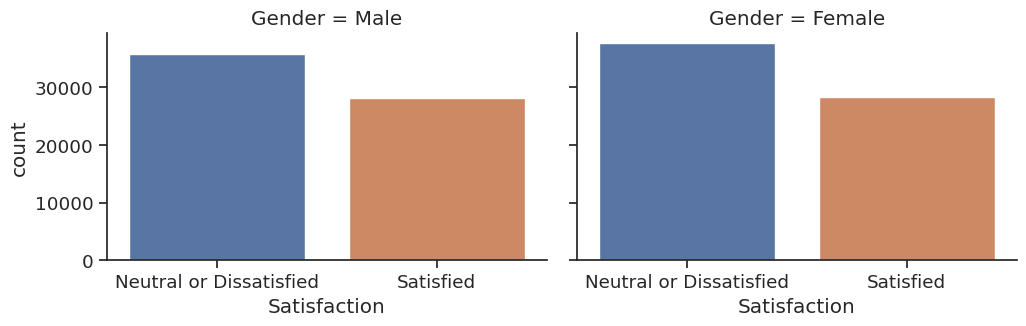

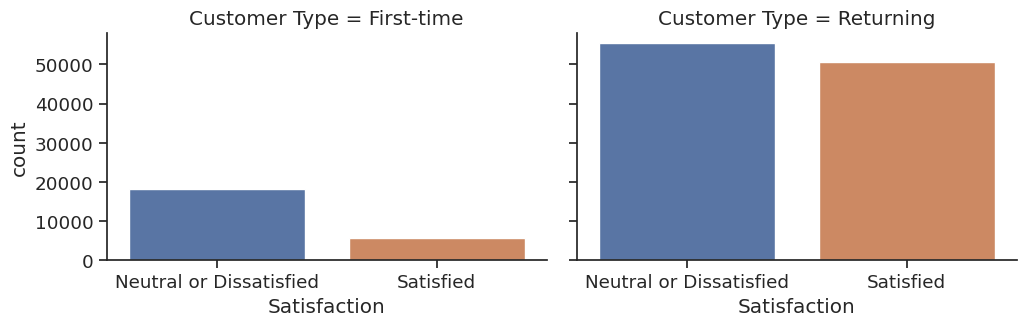

In [ ]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="Satisfaction", col="Gender", hue = 'Satisfaction',col_wrap=2, data=df, kind="count", height=3.5, aspect=1.5)
    g = sns.catplot(x="Satisfaction", col="Customer Type", hue = 'Satisfaction', col_wrap=2, data=df, kind="count", height=3.5, aspect=1.5)


gender distribution of neutral/dissatisfied and satisfied customers are similar. For both male and female passengers, number of neutral/dissatisfied customers are on the higher when compared to number of satisfied customers.

among returning passengers which are high in number, the ratio of satisfied and neutral/dissatisfied ones are almost close to 49:51.

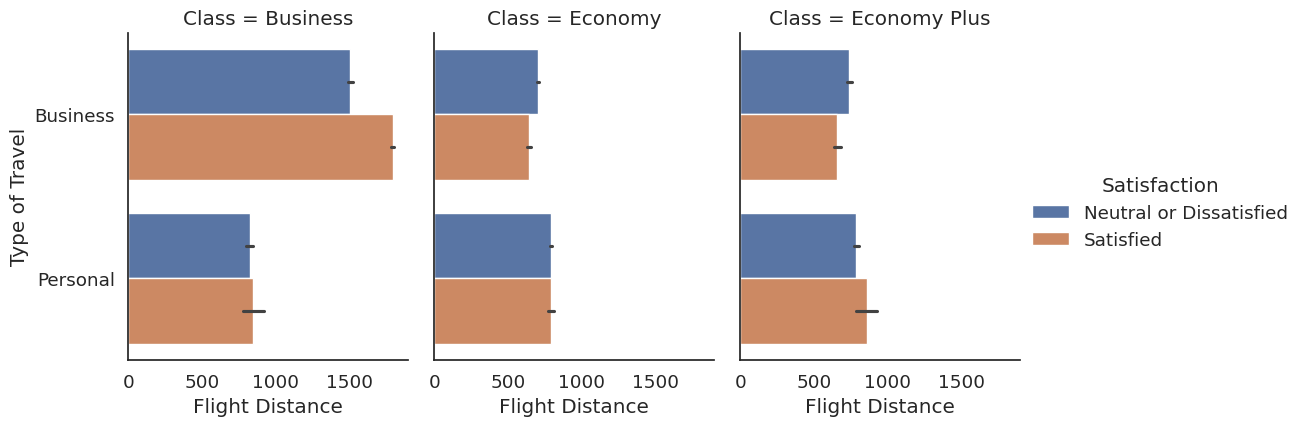

In [ ]:
# Type_of_Travel and Flight_Distance by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=.8)


For business travel in business class category, the number of satisfied passengers are quite on the higher for longer flight distance. For other combinations, almost equal distribution of satisfied and neutral/dissatisfied passengers is present.

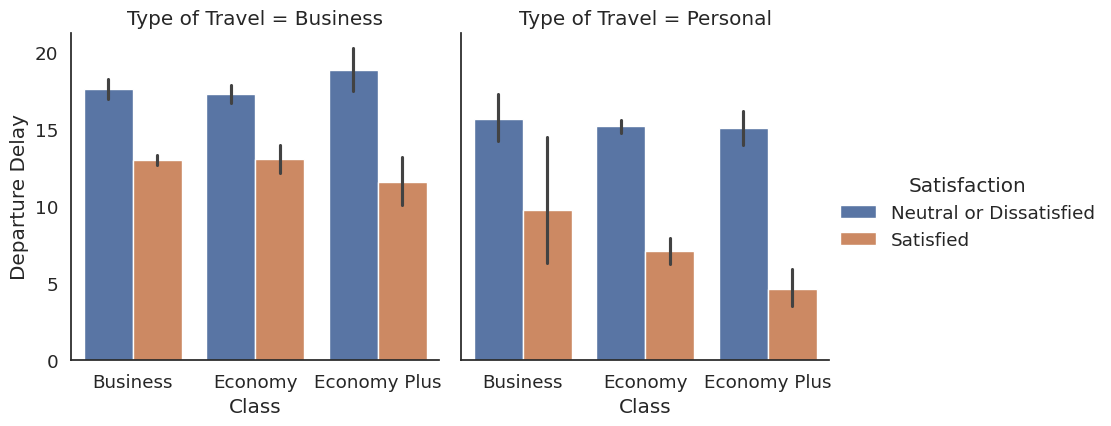

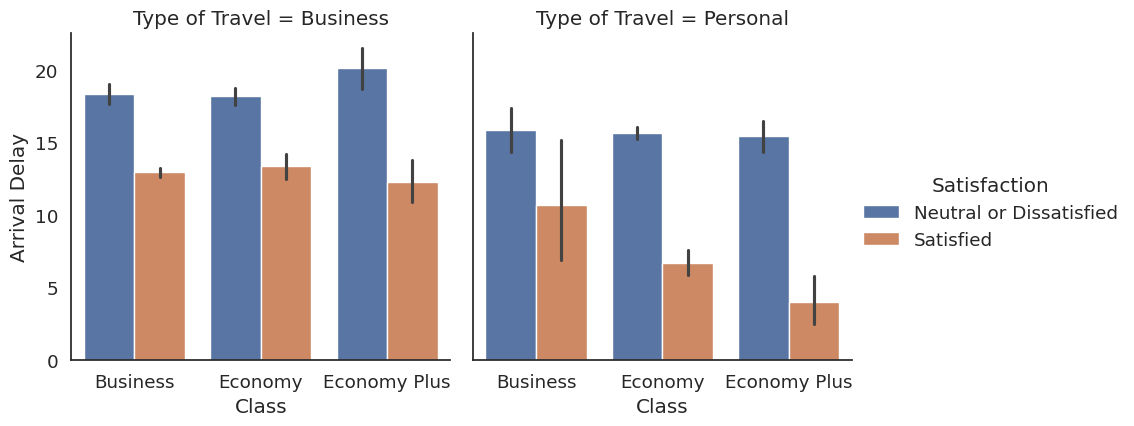

In [ ]:
# Departure_Delay and Arrival Delay by Type_of_Travel
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay", hue="Satisfaction", col="Type of Travel", data=df, kind="bar", height=4.5, aspect=1.0)
    g = sns.catplot(x="Class", y="Arrival Delay", hue="Satisfaction", col="Type of Travel", data=df, kind="bar", height=4.5, aspect=1.0)



For personal type of travel (specially for classes Eco Plus and Eco), the number of neutral/dissatisfied passengers are really high when arrival delay is high. By minute comparison, all combinations have higher number of neutral/dissatisfied passengers compared to the number of satisfied passengers.

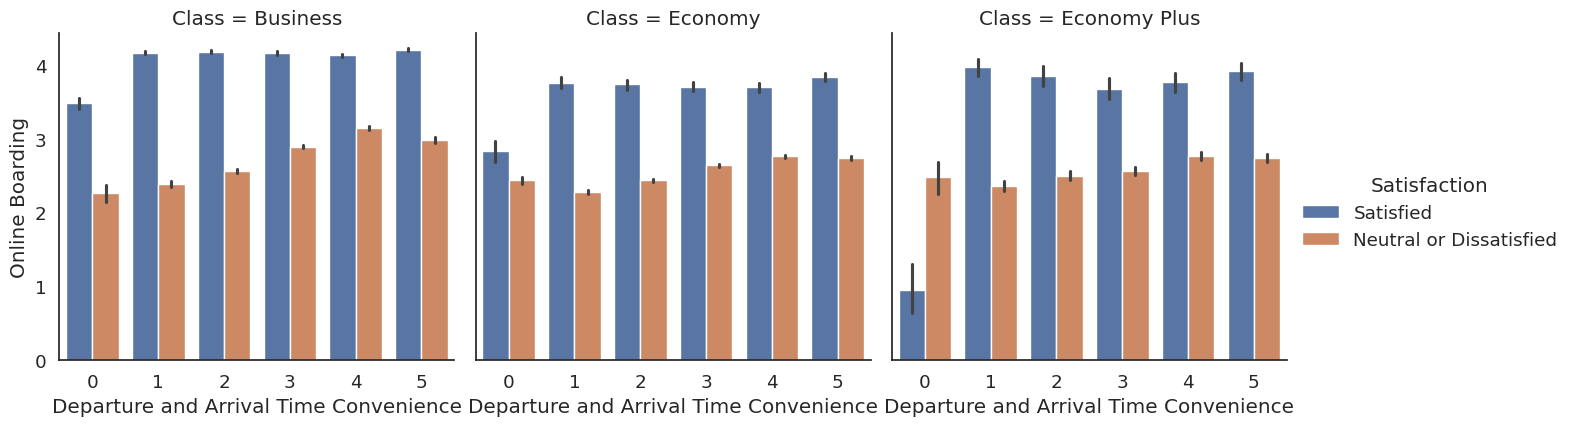

In [ ]:
# Online Boarding and Departure and Arrival Time Convenience by class
with sns.axes_style('white'):
    g = sns.catplot(x="Departure and Arrival Time Convenience", y="Online Boarding", hue="Satisfaction", col="Class", data=df, kind="bar", height=4.5, aspect=1.0)

For Eco Plus class, very inconvenient Departure/Arrival time i.e., Departure/Arrival_time_convenient = 0 has high number of neutral/dissatisfied passengers, even when online boarding is on positive side.

For other combinations, the number of satisfied passengers are higher compared to number of neutral/dissatisfied passengers.

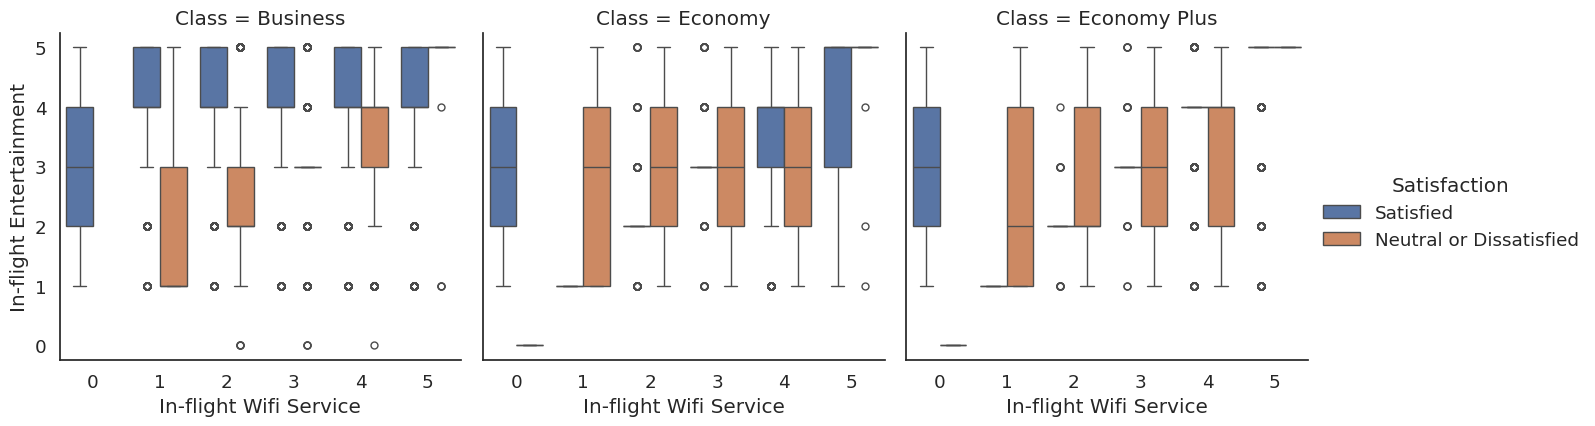

In [ ]:
# In-flight wifi service and In-flight Entertainment by Class
with sns.axes_style('white'):
    g = sns.catplot(x="In-flight Wifi Service", y="In-flight Entertainment", hue="Satisfaction", col="Class", data=df, kind="box", height=4.5, aspect=1.0)

Eco Plus passengers are mostly satisfied without in-flight wifi service (rating 0) and with moderate level of in-flight entertainment (rating 2 - 4).

For Business class passengers, only highest level of in-flight entertainment (rating 5) can bring satisfaction in them.

 For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

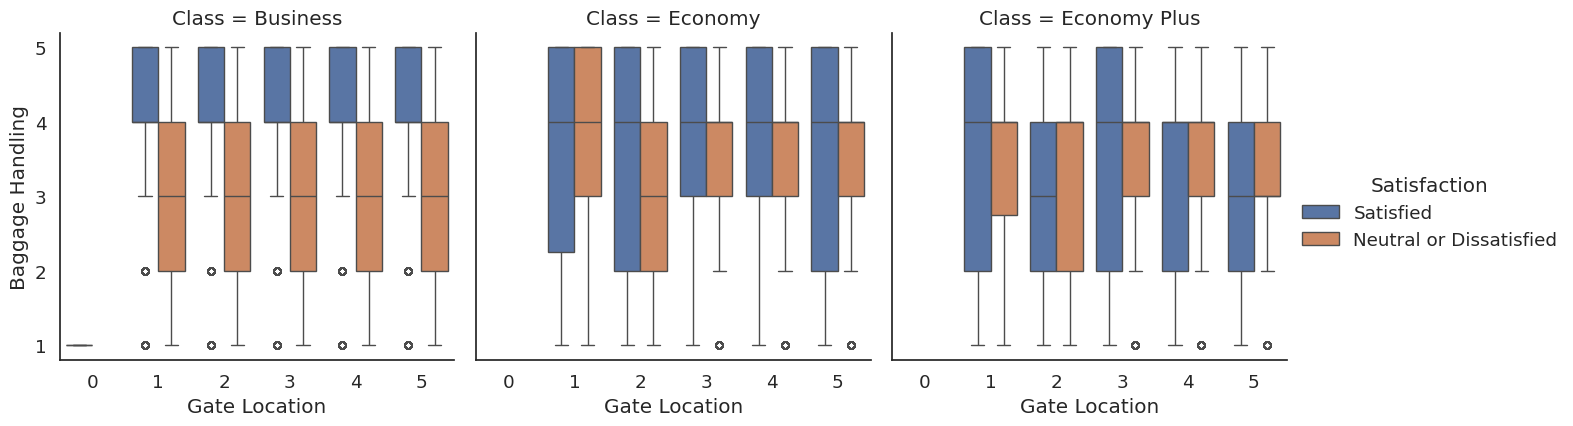

In [ ]:
# Gate_location and Baggage_handling by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Gate Location", y="Baggage Handling", hue="Satisfaction", col="Class", data=df, kind="box", height=4.5, aspect=1.0)

For business class passengers, all gate locations have higher number of neutral/dissatisfied passengers when baggage handling is not upto the satisfactory level (rating <= 4).

For Eco Plus class, when the gate location is 1 and for Eco class, when the gate location is 2, even when the baggages are handled in a mediocre way (rating 2 to 4), passengers remained neutral/dissatisfied.

<Axes: xlabel='In-flight Service', ylabel='Satisfaction'>

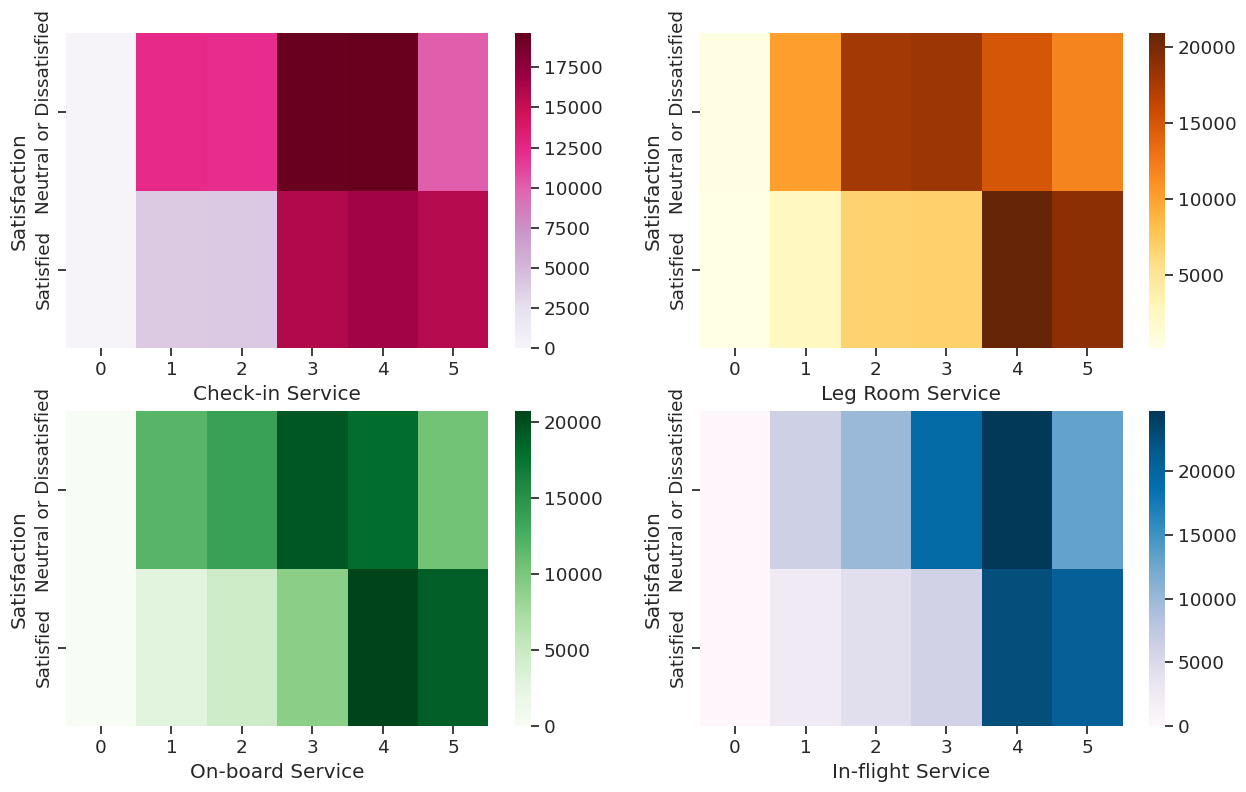

In [ ]:
# Checkin_service, Leg_room_service, On-board_service and Inflight_service

fig, axarr = plt.subplots(2, 2, figsize=(15, 9))

table1 = pd.crosstab(df['Satisfaction'], df['Check-in Service'])
sns.heatmap(table1, cmap='PuRd', ax = axarr[0][0])
table2 = pd.crosstab(df['Satisfaction'], df['Leg Room Service'])
sns.heatmap(table2, cmap='YlOrBr', ax = axarr[0][1])
table3 = pd.crosstab(df['Satisfaction'], df['On-board Service'])
sns.heatmap(table3, cmap='Greens', ax = axarr[1][0])
table4 = pd.crosstab(df['Satisfaction'], df['In-flight Service'])
sns.heatmap(table4, cmap='PuBu', ax = axarr[1][1])

For checkin services, the passengers who gave 0-2 rating are majorly neutral/dissatisfied.

 For other three services mentioned above, only the customers or passengers who give 4 and 5 rating belong to satisfied passengers category.

In [ ]:
df

Gender  Age Customer Type Type of Travel         Class  \
0         Male   48    First-time       Business      Business   
1       Female   35     Returning       Business      Business   
2         Male   41     Returning       Business      Business   
3         Male   50     Returning       Business      Business   
4       Female   49     Returning       Business      Business   
...        ...  ...           ...            ...           ...   
129875    Male   28     Returning       Personal  Economy Plus   
129876    Male   41     Returning       Personal  Economy Plus   
129877    Male   42     Returning       Personal  Economy Plus   
129878    Male   50     Returning       Personal  Economy Plus   
129879  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   821                2            5.0   
1                   821               26           39.0   
2                   853                0            0.0   
3                  1905                0            0.0   
4                  3470                0            1.0   
...                 ...              ...            ...   
129875              447                2            3.0   
129876              308                0            0.0   
129877              337                6           14.0   
129878              337               31           22.0   
129879              337                0            0.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
0                                            3                       3  ...   
1                                            2                       2  ...   
2                                            4                       4  ...   
3                                            2                       2  ...   
4                                            3                       3  ...   
...                                        ...                     ...  ...   
129875                                       4                       4  ...   
129876                                       5                       3  ...   
129877                                       5                       2  ...   
129878                                       4                       4  ...   
129879                                       1                       3  ...   

        On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                      3             5                 2            5   
1                      5             4                 5            5   
2                      3             5                 3            5   
3                      5             5                 5            4   
4                      3             4                 4            5   
...                  ...           ...               ...          ...   
129875                 5             1                 4            4   
129876                 5             2                 5            2   
129877                 3             3                 4            3   
129878                 4             4                 5            3   
129879                 4             2                 4            2   

        Food and Drink  In-flight Service  In-flight Wifi Service  \
0                    5                  5                       3   
1                    3                  5                       2   
2                    5                  3                       4   
3                    4                  5                       2   
4                    4                  3                       3   
...                ...                ...                     ...   
129875               4                  5                       4   
129876               2                  4                       3   
129877               3                  4                  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to a specific column (e.g., 'Gender')
#df_cleaned['Gender','Satisfaction'] = label_encoder.fit_transform(df_cleaned['Gender','Satisfaction'])

# Apply label encoding to a multiple column (e.g., 'Gender')
#df_cleaned[['Gender', 'Satisfaction','Customer Type','Type of Travel','Class']] = df_cleaned[['Gender', 'Satisfaction','Customer Type','Type of Travel','Class']].apply(LabelEncoder().fit_transform)
df.iloc[:,[0,2,3,4,22]] = df.iloc[:, [0,2,3,4,22]].apply(LabelEncoder().fit_transform)
print(df)

       Gender  Age Customer Type Type of Travel Class  Flight Distance  \
0           1   48             0              0     0              821   
1           0   35             1              0     0              821   
2           1   41             1              0     0              853   
3           1   50             1              0     0             1905   
4           0   49             1              0     0             3470   
...       ...  ...           ...            ...   ...              ...   
129875      1   28             1              1     2              447   
129876      1   41             1              1     2              308   
129877      1   42             1              1     2              337   
129878      1   50             1              1     2              337   
129879      0   20             1              1     2              337   

        Departure Delay  Arrival Delay  \
0                     2            5.0   
1                    26    

Correlation between departure and arrival delays:  0.9652911835463334


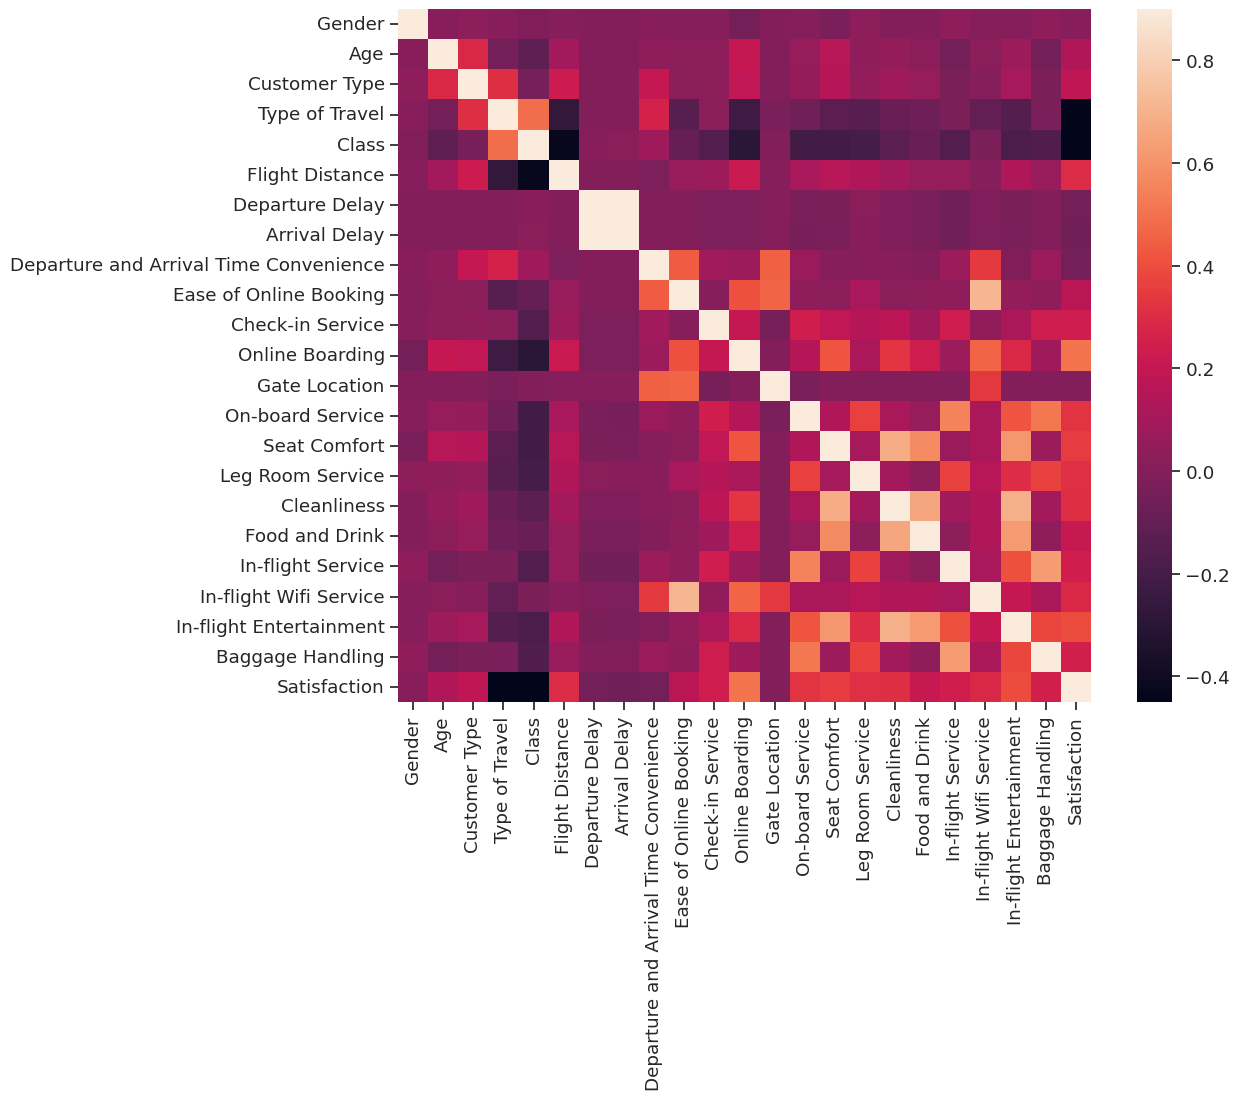

In [ ]:
#Onlycolumn (arrival and departure delay) has any missing values, and the number is not large. We could just remove the relevant instances,
#but something in the correlation diagrams above indicates that perhaps we could impute them!
#For this we first want to check how much the arrival delay and departure delay are correlated:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
print ('Correlation between departure and arrival delays: ', corrmat['Arrival Delay']['Departure Delay'])

In [ ]:
# Fix data by imputation
#df['Arrival Delay'].fillna(df['Departure Delay'], inplace = True)
#print (df.isnull().sum())

In [ ]:
# summarize the central tendency, dispersion and shape of a dataset's distribution.
#These statistics include the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (also known as the median), 75th percentile, and maximum.
df.describe()

Age  Flight Distance  Departure Delay  Arrival Delay  \
count  129880.000000    129880.000000    129880.000000  129487.000000   
mean       39.427957      1190.316392        14.713713      15.091129   
std        15.119360       997.452477        38.071126      38.465650   
min         7.000000        31.000000         0.000000       0.000000   
25%        27.000000       414.000000         0.000000       0.000000   
50%        40.000000       844.000000         0.000000       0.000000   
75%        51.000000      1744.000000        12.000000      13.000000   
max        85.000000      4983.000000      1592.000000    1584.000000   

       Departure and Arrival Time Convenience  Ease of Online Booking  \
count                           129880.000000           129880.000000   
mean                                 3.057599                2.756876   
std                                  1.526741                1.401740   
min                                  0.000000                0.000000   
25%                                  2.000000                2.000000   
50%                                  3.000000                3.000000   
75%                                  4.000000                4.000000   
max                                  5.000000                5.000000   

       Check-in Service  Online Boarding  Gate Location  On-board Service  \
count     129880.000000    129880.000000  129880.000000     129880.000000   
mean           3.306267         3.252633       2.976925          3.383023   
std            1.266185         1.350719       1.278520          1.287099   
min            0.000000         0.000000       0.000000          0.000000   
25%            3.000000         2.000000       2.000000          2.000000   
50%            3.000000         3.000000       3.000000          4.000000   
75%            4.000000         4.000000       4.000000          4.000000   
max            5.000000         5.000000       5.000000          5.000000   

        Seat Comfort  Leg Room Service    Cleanliness  Food and Drink  \
count  129880.000000     129880.000000  129880.000000   129880.000000   
mean        3.441361          3.350878       3.286326        3.204774   
std         1.319289          1.316252       1.313682        1.329933   
min         0.000000          0.000000       0.000000        0.000000   
25%         2.000000          2.000000       2.000000        2.000000   
50%         4.000000          4.000000       3.000000        3.000000   
75%         5.000000          4.000000       4.000000        4.000000   
max         5.000000          5.000000       5.000000        5.000000   

       In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
count      129880.000000           129880.000000            129880.000000   
mean            3.642193                2.728696                 3.358077   
std             1.176669                1.329340                 1.334049   
min             0.000000                0.000000                 0.000000   
25%             3.000000                2.000000                 2.000000   
50%             4.000000                3.000000                 4.000000   
75%             5.000000                4.000000                 4.000000   
max             5.000000                5.000000                 5.000000   

       Baggage Handling  
count     129880.000000  
mean           3.632114  
std            1.180025  
min            1.000000  
25%            3.000000  
50%            4.000000  
75%            5.000000  
max            5.000000

In [ ]:
# Drop rows with any missing values
#df_cleaned = df.dropna(axis=0)

# Drop specific column rows with missing values
df = df.dropna(subset=['Arrival Delay'])

In [ ]:
#after deleting rows with missing values
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                              0
dtype: int64

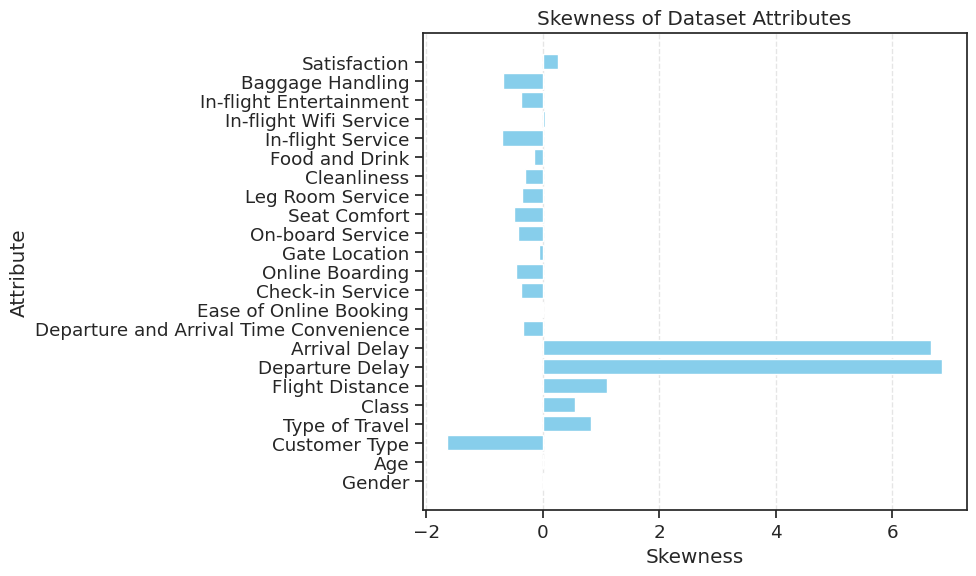

In [ ]:
def calculate_skewness(df):
    """
    Calculates skewness for each numeric attribute in the DataFrame.
    Returns a DataFrame with attribute names and their corresponding skewness values.
    """
    skewness_values = df.apply(lambda x: x.skew())
    skewness_df = pd.DataFrame({"Attribute": skewness_values.index, "Skewness": skewness_values.values})
    return skewness_df

def plot_skewness(skewness_df):
    """
    Plots skewness values for each attribute.
    """
    plt.figure(figsize=(10, 6))
    plt.barh(skewness_df["Attribute"], skewness_df["Skewness"], color="skyblue")
    plt.xlabel("Skewness")
    plt.ylabel("Attribute")
    plt.title("Skewness of Dataset Attributes")
    plt.grid(axis="x", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

# Assuming you've already loaded your dataset into a DataFrame called 'df'
skewness_df = calculate_skewness(df)
plot_skewness(skewness_df)

In [ ]:
#df['Arrival Delay'].describe()

In [ ]:
#Plot and check the distribution
#from scipy.stats import skew, skewtest, norm
#plt.figure(figsize=(10,6))
#sns.distplot(df['Arrival Delay'],fit=norm, color ="r")
#plt.show()

In [ ]:
#print("Skew of raw data: %f" % df['Arrival Delay'].skew()) #check skewness

In [ ]:
# Assuming 'df' is your DataFrame
#df['LogArrivalDelay'] = np.log(df['Arrival Delay'])

# Remove infinite values from 'LogArrivalDelay'
#df = df[np.isfinite(df['LogArrivalDelay'])]

# Check distribution, skewness, and kurtosis
# Visualize distribution
#sns.distplot(df['LogArrivalDelay'], fit=norm, color="r")
#plt.show()

# Print skewness after Log Transformation
#print("Skew after Log Transformation: %f" % df['LogArrivalDelay'].skew())

# Descriptive statistics
#print(df['LogArrivalDelay'].describe())

In [ ]:
# Assuming 'df' is your DataFrame
skewness_all = df.skew()

print("Skewness for each attribute:")
print(skewness_all)

Skewness for each attribute:
Gender                                    0.029644
Age                                      -0.003376
Customer Type                            -1.638481
Type of Travel                             0.82551
Class                                      0.54765
Flight Distance                           1.108433
Departure Delay                           6.853578
Arrival Delay                             6.670125
Departure and Arrival Time Convenience   -0.332296
Ease of Online Booking                   -0.018562
Check-in Service                         -0.366579
Online Boarding                          -0.457026
Gate Location                            -0.058324
On-board Service                         -0.421485
Seat Comfort                             -0.486211
Leg Room Service                         -0.348475
Cleanliness                              -0.300926
Food and Drink                           -0.155055
In-flight Service                        -0.692118
In

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
skew_threshold = 0.5  # Set your skewness threshold here

# Find skewed attributes
skewness_all = df.skew()
skewed_attributes = skewness_all[abs(skewness_all) > skew_threshold].index

# Apply log transformation to skewed attributes
for column in skewed_attributes:
    if df[column].dtype in [np.float64, np.float32, np.float16, np.int64, np.int32, np.int16]:
        # Apply log transformation only to numerical columns
        min_value = df[column].min()
        if min_value > 0:  # Ensure all values are positive before applying log transformation
            df[column] = np.log1p(df[column])
        else:
            # Handle negative or zero values differently, e.g., shift the data before applying log transformation
            df[column] = np.log1p(df[column] - min_value + 1)

# Print information about applied transformations
print("Applied log transformation to the following attributes:")
print(skewed_attributes)


Applied log transformation to the following attributes:
Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Departure Delay', 'Arrival Delay', 'In-flight Service',
       'Baggage Handling'],
      dtype='object')


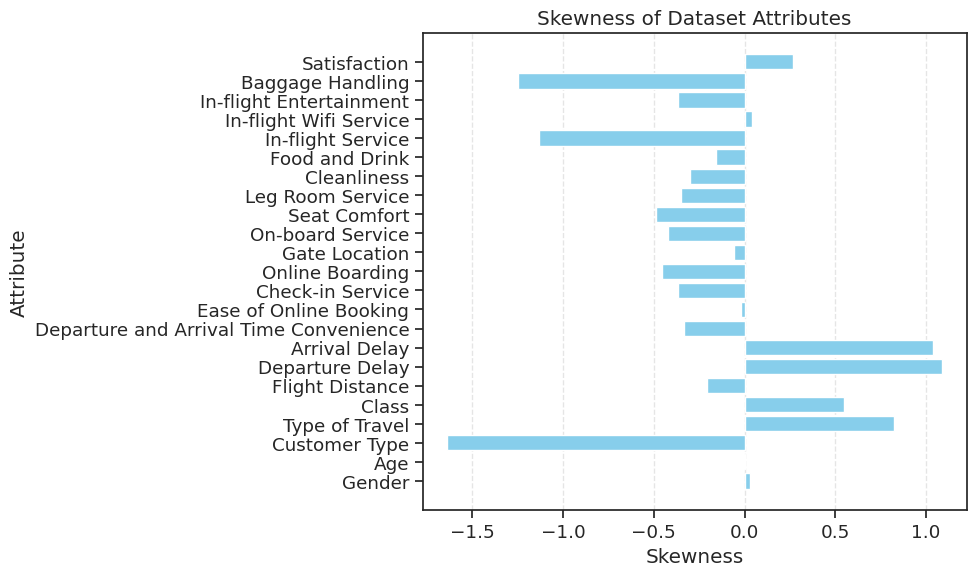

In [ ]:
skewness_df = calculate_skewness(df)
plot_skewness(skewness_df)

In [ ]:
skewness_df = calculate_skewness(df)
print(skewness_df)

                                 Attribute  Skewness
0                                   Gender  0.029644
1                                      Age -0.003376
2                            Customer Type -1.638481
3                           Type of Travel  0.825510
4                                    Class  0.547650
5                          Flight Distance -0.205316
6                          Departure Delay  1.087984
7                            Arrival Delay  1.039708
8   Departure and Arrival Time Convenience -0.332296
9                   Ease of Online Booking -0.018562
10                        Check-in Service -0.366579
11                         Online Boarding -0.457026
12                           Gate Location -0.058324
13                        On-board Service -0.421485
14                            Seat Comfort -0.486211
15                        Leg Room Service -0.348475
16                             Cleanliness -0.300926
17                          Food and Drink -0.

In [ ]:
skewness_df = calculate_skewness(df)
(skewness_df)

Attribute  Skewness
0                                   Gender  0.029644
1                                      Age -0.003376
2                            Customer Type -1.638481
3                           Type of Travel  0.825510
4                                    Class  0.547650
5                          Flight Distance -0.205316
6                          Departure Delay  1.087984
7                            Arrival Delay  1.039708
8   Departure and Arrival Time Convenience -0.332296
9                   Ease of Online Booking -0.018562
10                        Check-in Service -0.366579
11                         Online Boarding -0.457026
12                           Gate Location -0.058324
13                        On-board Service -0.421485
14                            Seat Comfort -0.486211
15                        Leg Room Service -0.348475
16                             Cleanliness -0.300926
17                          Food and Drink -0.155055
18                       In-flight Service -1.132550
19                  In-flight Wifi Service  0.040403
20                 In-flight Entertainment -0.366486
21                        Baggage Handling -1.248892
22                            Satisfaction  0.264284

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                         1.0
Age                                           24.0
Customer Type                                  0.0
Type of Travel                                 1.0
Class                                          1.0
Flight Distance                           1.436231
Departure Delay                            1.94591
Arrival Delay                             2.014903
Departure and Arrival Time Convenience         2.0
Ease of Online Booking                         2.0
Check-in Service                               1.0
Online Boarding                                2.0
Gate Location                                  2.0
On-board Service                               2.0
Seat Comfort                                   3.0
Leg Room Service                               2.0
Cleanliness                                    2.0
Food and Drink                                 2.0
In-flight Service                         0.336472
In-flight Wifi Service         

Checking for outliers

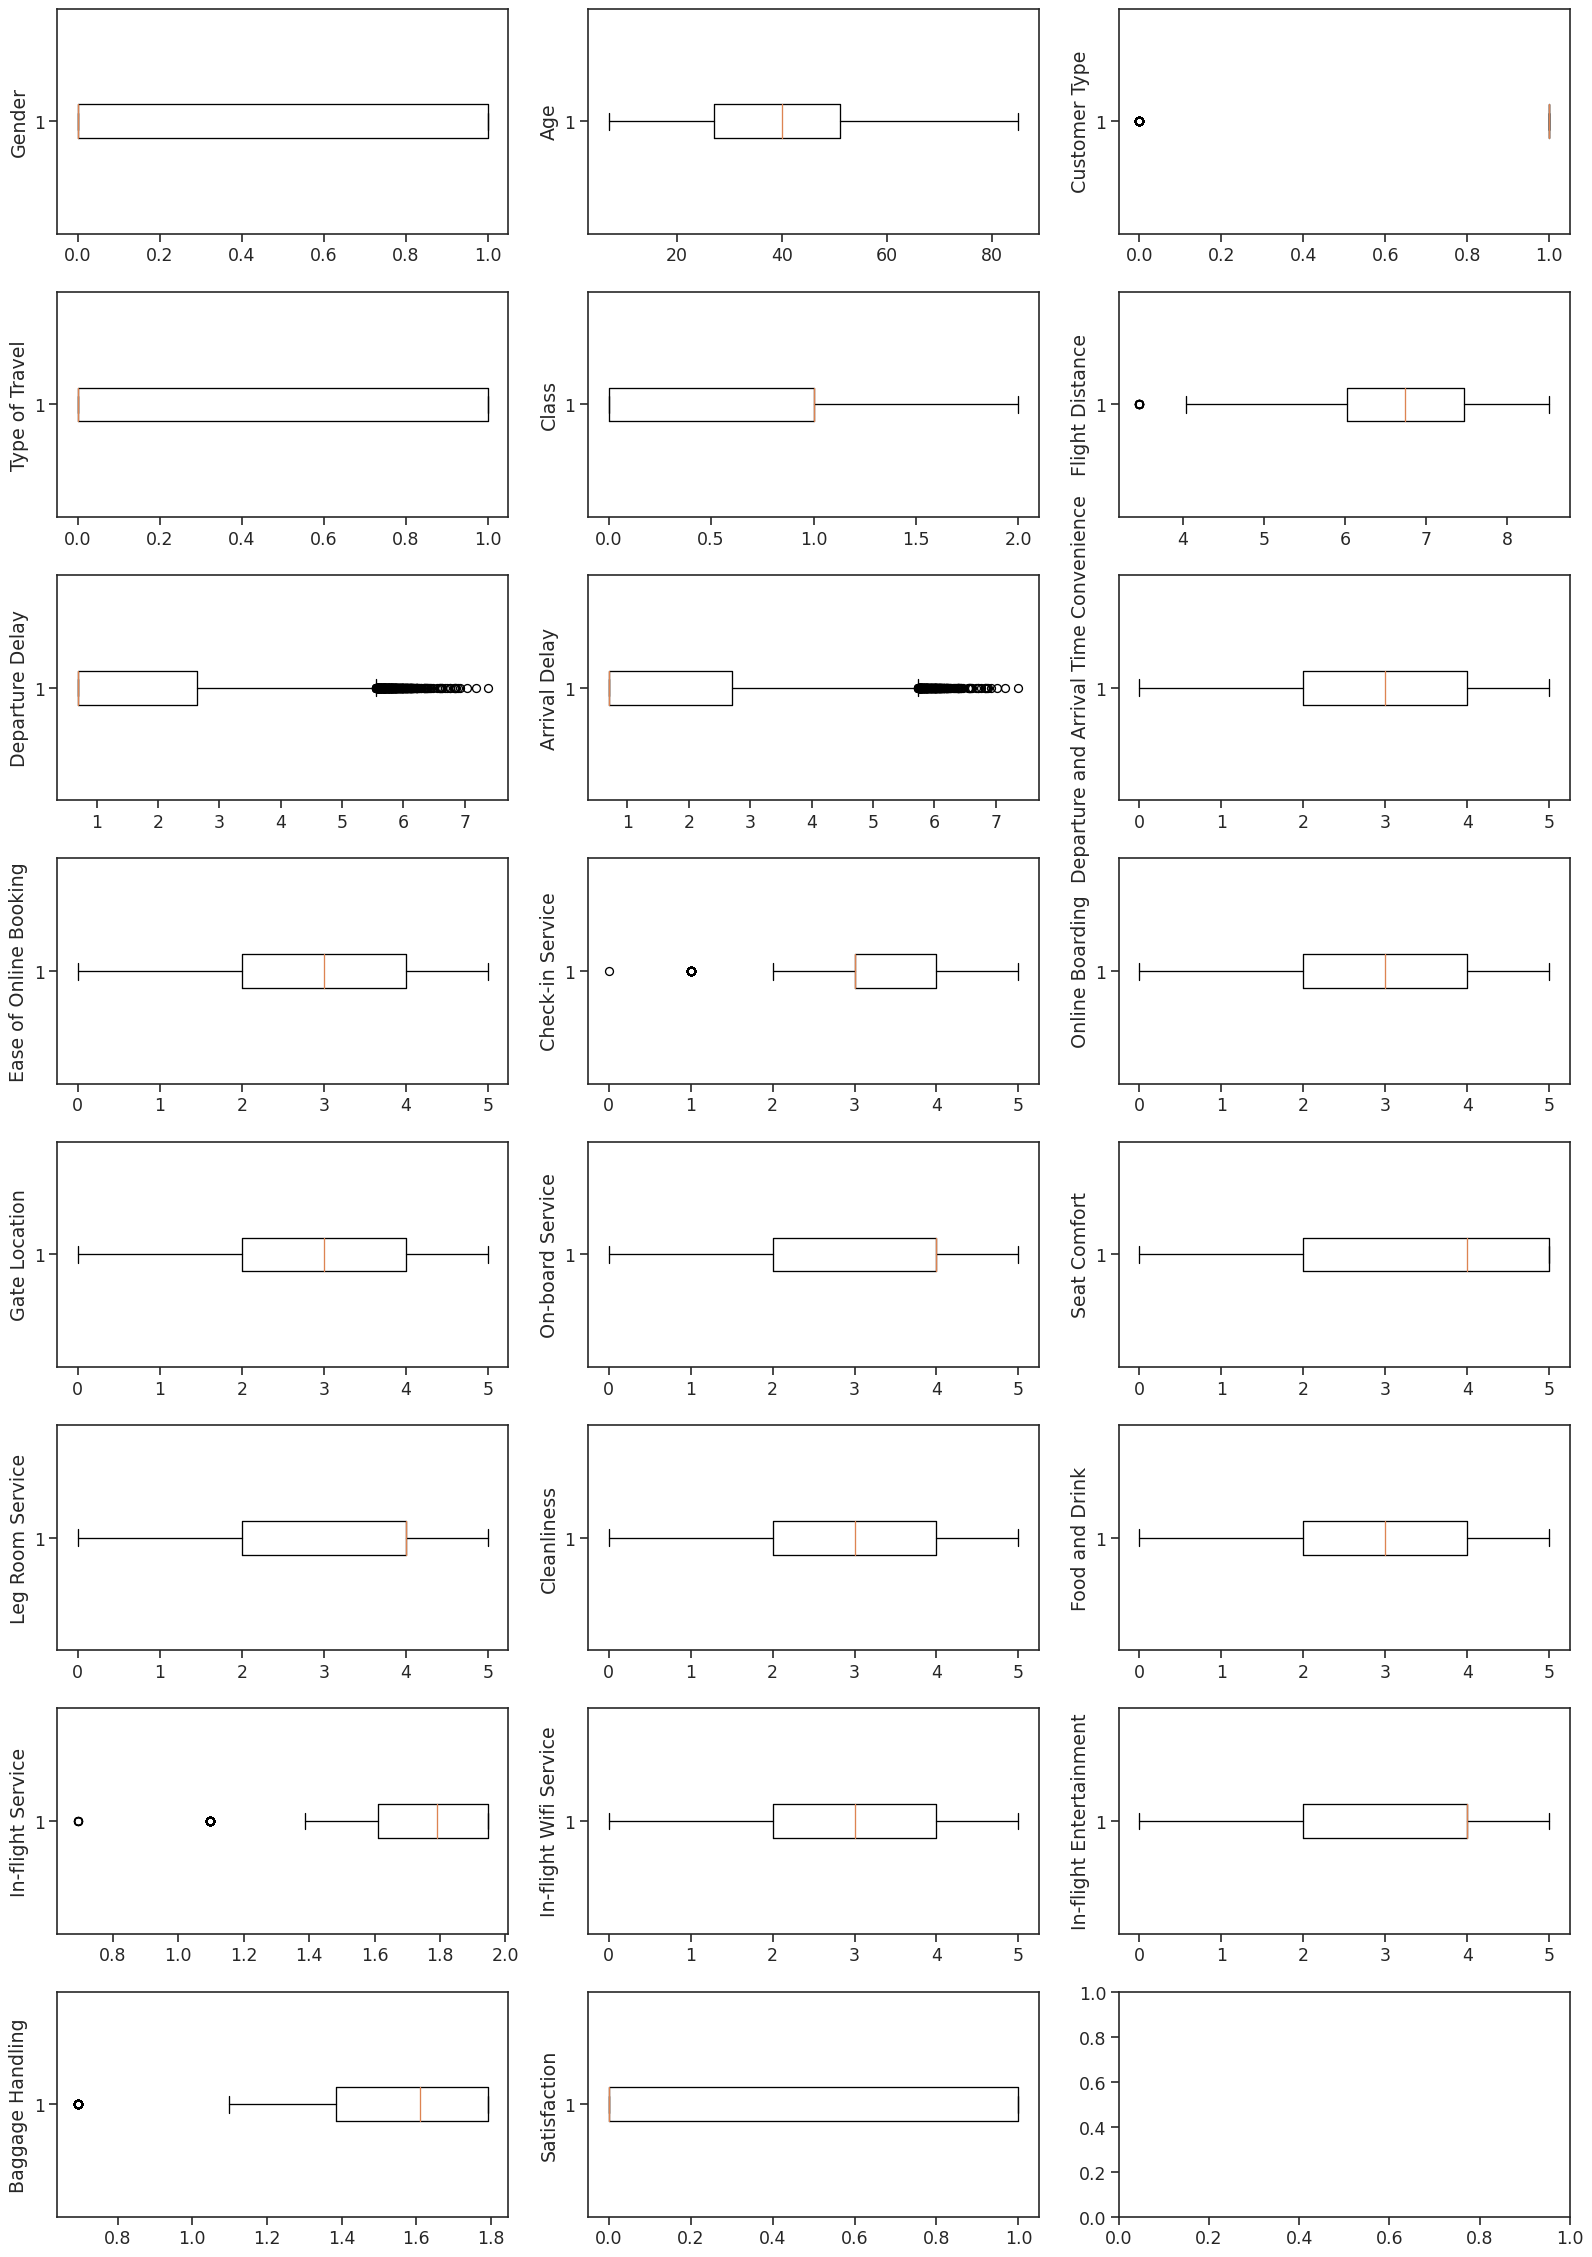

In [ ]:
#check for outliers
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
fig, axs = plt.subplots(8, 3, dpi=95, figsize=(17, 24))  # Adjust figsize as needed
axs = axs.ravel()  # Flatten the axs array for easy iteration
for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

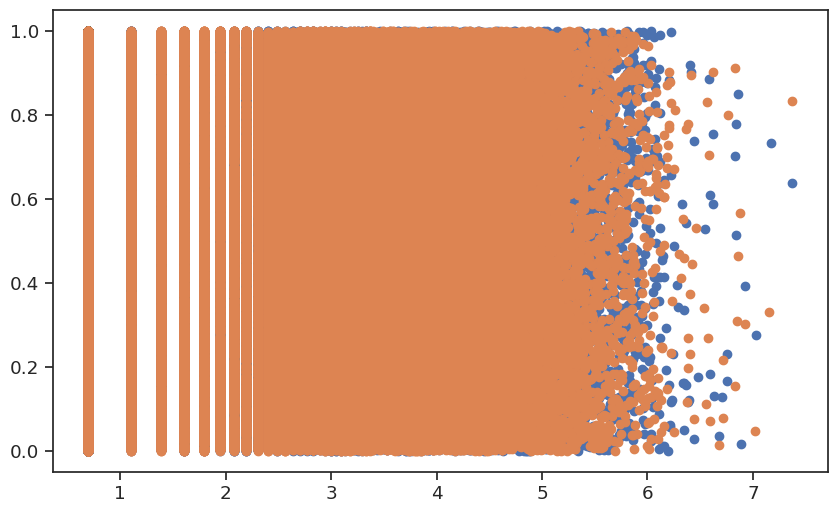

In [ ]:
plt.scatter (df['Departure Delay'], np.random.rand(df.shape[0])) #blue
plt.scatter (df['Arrival Delay'], np.random.rand(df.shape[0])) #brown

In [ ]:
Arrival_Delay_Count = ((df['Arrival Delay']> 6).sum())
print("Arrival Delay Count =",Arrival_Delay_Count)
Departure_Delay_Count = ((df['Departure Delay']> 6).sum())
print("Departure Delay Count =",Departure_Delay_Count)
total = (((df['Departure Delay']> 6) + (df['Arrival Delay']> 6)).sum())
print("Total of Arrival and Departure Delay Count =",total)

Arrival Delay Count = 110
Departure Delay Count = 97
Total of Arrival and Departure Delay Count = 113


by dropping only 46 instances got rid of all delays larger than 500 minutes

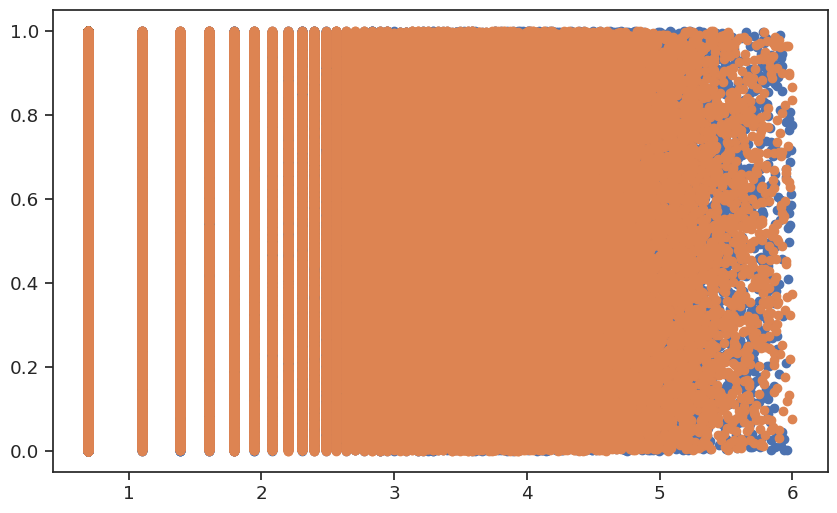

In [ ]:
df = df[(df['Arrival Delay'] <= 6)]
df = df[(df['Departure Delay'] <= 6)]
plt.scatter (df['Departure Delay'], np.random.rand(df.shape[0]))
plt.scatter (df['Arrival Delay'], np.random.rand(df.shape[0]))

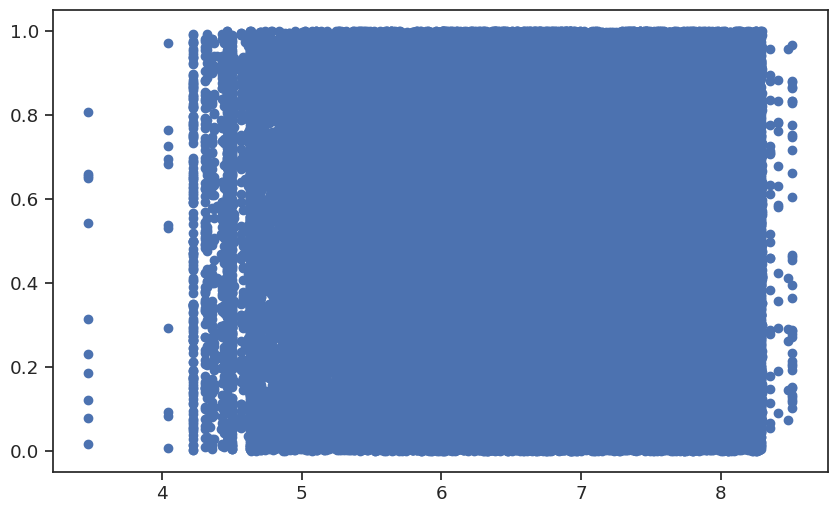

In [ ]:
plt.scatter (df['Flight Distance'], np.random.rand(df.shape[0]))

Finding Correlation among Features

<Axes: >

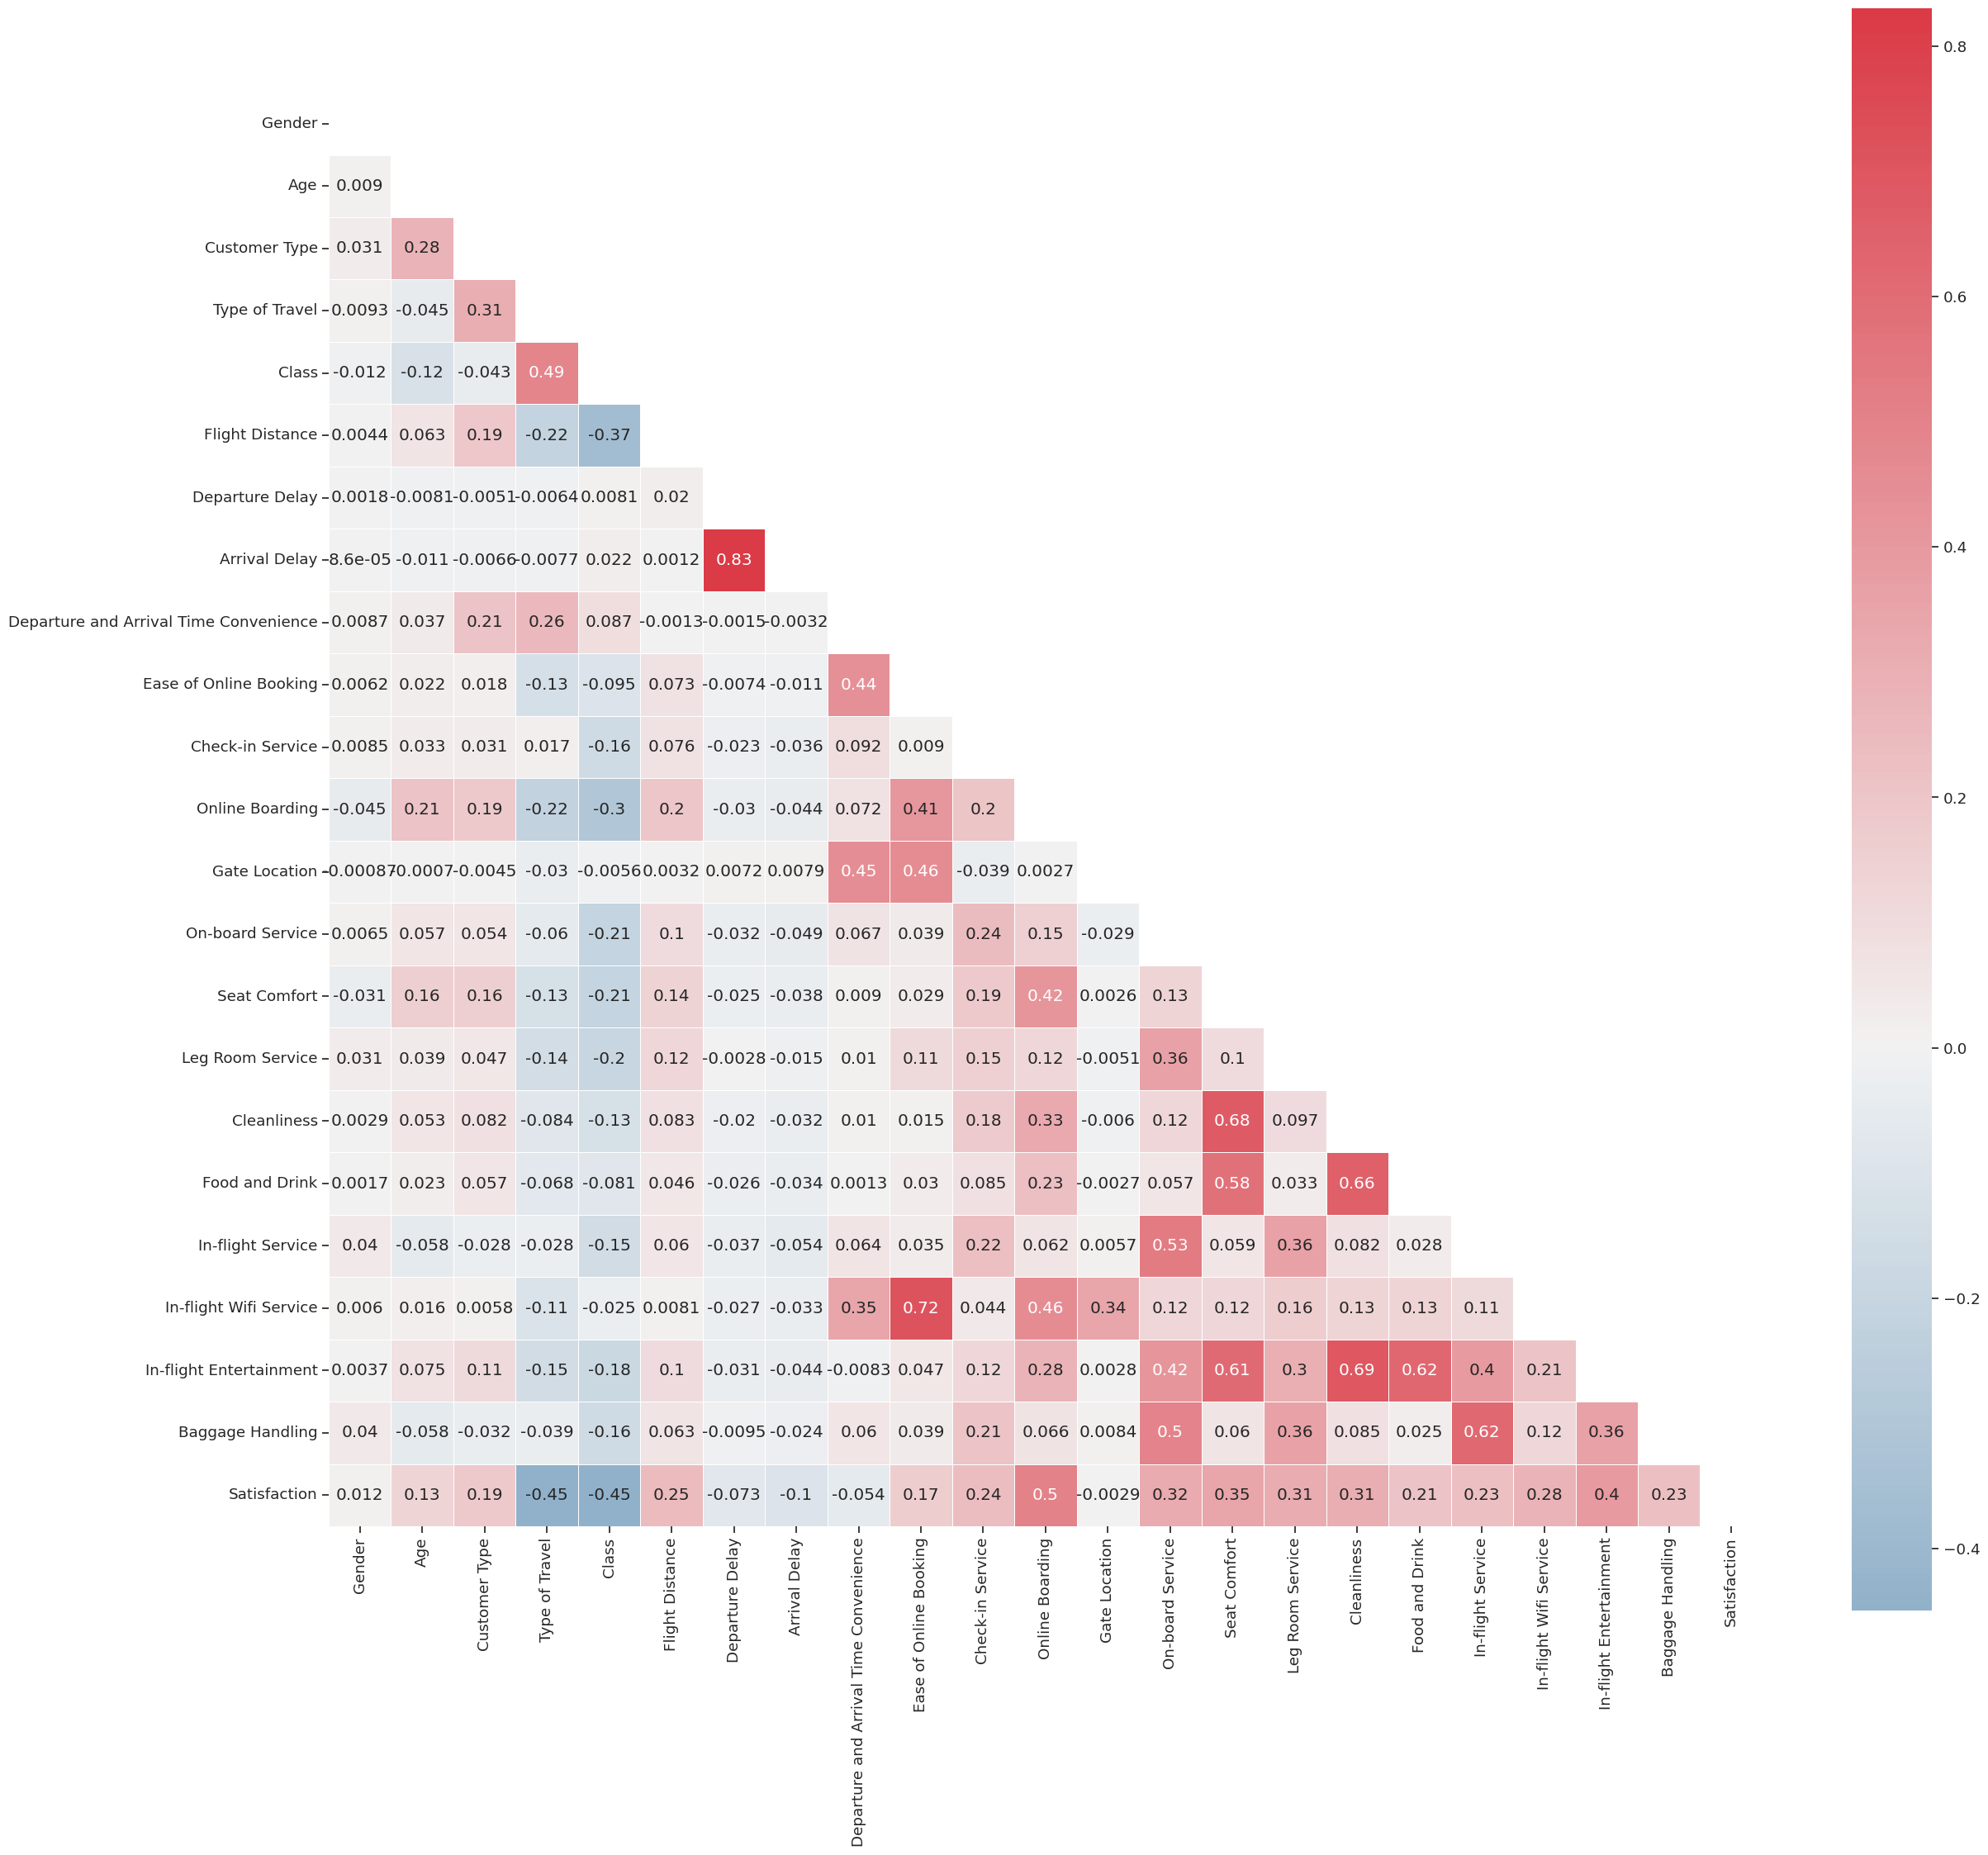

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
f, ax = plt.subplots(figsize=(28, 28))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,
square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

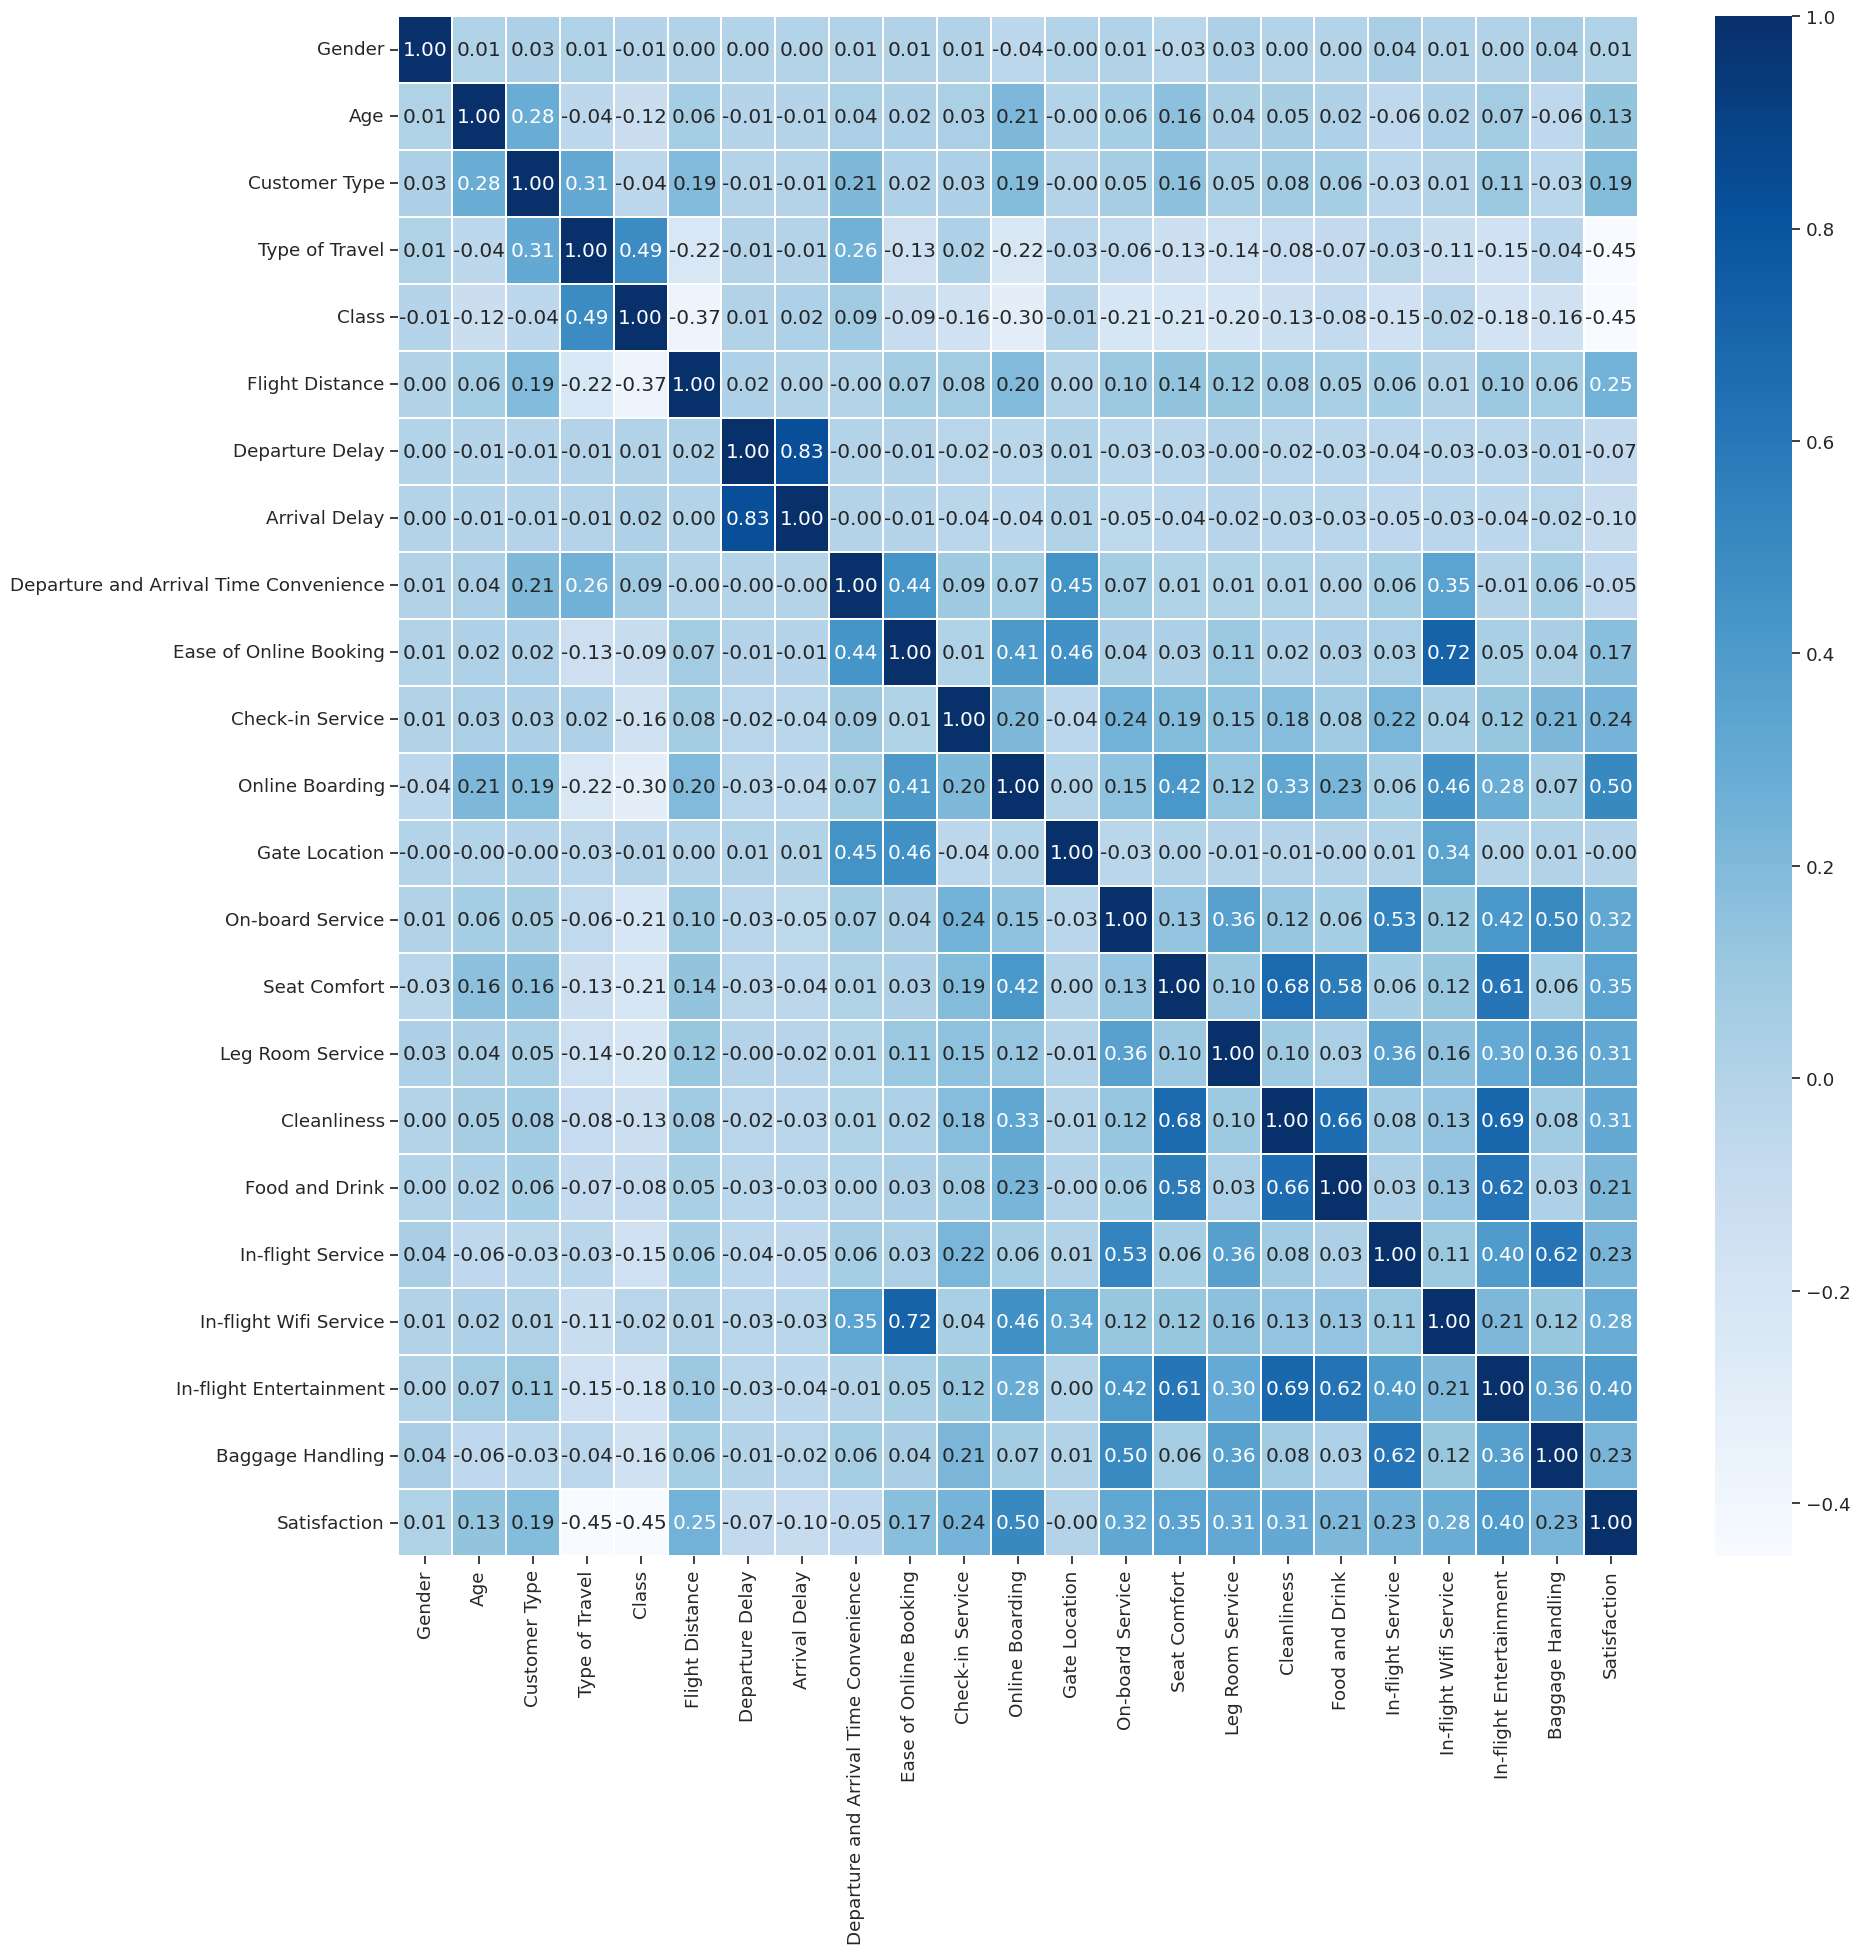

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(df.corr(), annot=True, linewidth=0.2, fmt=".2f", cmap="Blues");

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service"  But no pair is having corrrelation coefficient exactly equal to 1. Therefore there is no perfect multi-collinearity. Hence we are not discarding any variable.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
r_scaler = MinMaxScaler()
r_scaler.fit(df)
modified_data = pd.DataFrame(r_scaler.transform(df), columns=df.columns)
modified_data.head()

Gender       Age  Customer Type  Type of Travel  Class  Flight Distance  \
0     1.0  0.525641            0.0             0.0    0.0         0.642996   
1     0.0  0.358974            1.0             0.0    0.0         0.642996   
2     1.0  0.435897            1.0             0.0    0.0         0.650561   
3     1.0  0.551282            1.0             0.0    0.0         0.809592   
4     0.0  0.538462            1.0             0.0    0.0         0.928334   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0         0.130701       0.236112                                     0.6   
1         0.497625       0.569270                                     0.4   
2         0.000000       0.000000                                     0.8   
3         0.000000       0.000000                                     0.4   
4         0.000000       0.076419                                     0.6   

   Ease of Online Booking  ...  On-board Service  Seat Comfort  \
0                     0.6  ...               0.6           1.0   
1                     0.4  ...               1.0           0.8   
2                     0.8  ...               0.6           1.0   
3                     0.4  ...               1.0           1.0   
4                     0.6  ...               0.6           0.8   

   Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0               0.4          1.0             1.0           1.000000   
1               1.0          1.0             0.6           1.000000   
2               0.6          1.0             1.0           0.731416   
3               1.0          0.8             0.8           1.000000   
4               0.8          1.0             0.8           0.731416   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                     0.6                      1.0           1.00000   
1                     0.4                      1.0           1.00000   
2                     0.8                      0.6           0.63093   
3                     0.4                      1.0           1.00000   
4                     0.6                      0.6           0.63093   

   Satisfaction  
0           0.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  

[5 rows x 23 columns]

Selection of top 10 features using Chi-Square

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


In [ ]:
X = modified_data.loc[:,modified_data.columns!='Satisfaction']
y = modified_data[['Satisfaction']]


selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Type of Travel', 'Class', 'Online Boarding',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'In-flight Wifi Service', 'In-flight Entertainment'],
      dtype='object')


feature Selection using Wrapper Method

In [ ]:

X = modified_data.drop('Satisfaction', axis=1)
y = modified_data['Satisfaction']
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)


['Type of Travel', 'Class', 'Online Boarding', 'In-flight Wifi Service', 'In-flight Entertainment']


'Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding',  'Inflight_entertainment'

Only these five features are inherently important in contributing towards the customer or passenger satisfaction.

Another feature importance deciding method is also used to cross check the results obtained in this method.

Feature Permutation Importance

In [ ]:
 #splitting the dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)
print(X_train)

        Gender       Age  Customer Type  Type of Travel  Class  \
860        1.0  0.615385            1.0             0.0    0.0   
125157     0.0  0.269231            0.0             0.0    0.0   
65580      1.0  0.448718            1.0             0.0    0.0   
90930      1.0  0.641026            1.0             0.0    1.0   
32393      1.0  0.358974            1.0             0.0    0.0   
...        ...       ...            ...             ...    ...   
45891      1.0  0.269231            1.0             0.0    0.0   
117952     1.0  0.551282            1.0             0.0    0.0   
42613      0.0  0.538462            1.0             0.0    0.5   
43567      1.0  0.410256            1.0             0.0    1.0   
68268      0.0  0.679487            1.0             0.0    0.0   

        Flight Distance  Departure Delay  Arrival Delay  \
860            0.861819          0.00000       0.000000   
125157         0.627461          0.00000       0.000000   
65580          0.747340       

In [ ]:
print("The training data size is : {} ".format(X_train.shape))
print("The test data size is : {} ".format(X_test.shape))

The training data size is : (103499, 22) 
The test data size is : (25875, 22) 


In [ ]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    # Create a confusion matrix display
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    # Plot the confusion matrix
    disp.plot()
    plt.show()
    ax = plt.gca()
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, alpha=0.8)

    return model, accuracy, roc_auc, time_taken



Naive Bayes Classifier

Accuracy = 0.8679033816425121
ROC Area under Curve = 0.8631419711503192
Time taken = 0.10327291488647461
              precision    recall  f1-score   support

         0.0    0.87317   0.89799   0.88541     14705
         1.0    0.86049   0.82829   0.84408     11170

    accuracy                        0.86790     25875
   macro avg    0.86683   0.86314   0.86475     25875
weighted avg    0.86770   0.86790   0.86757     25875



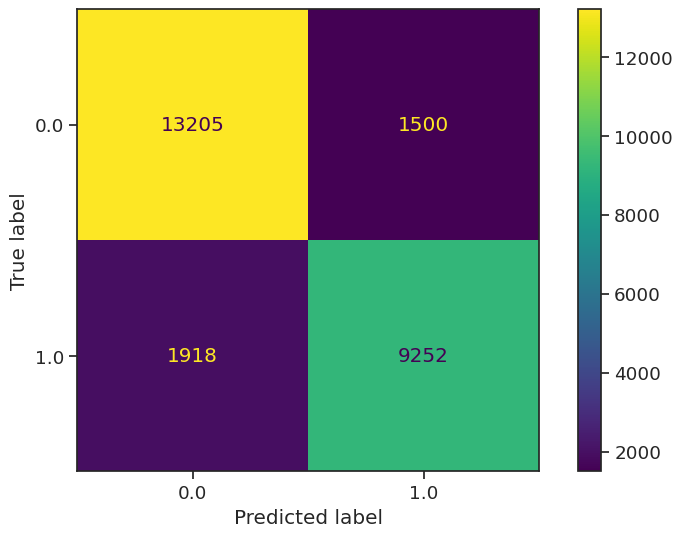

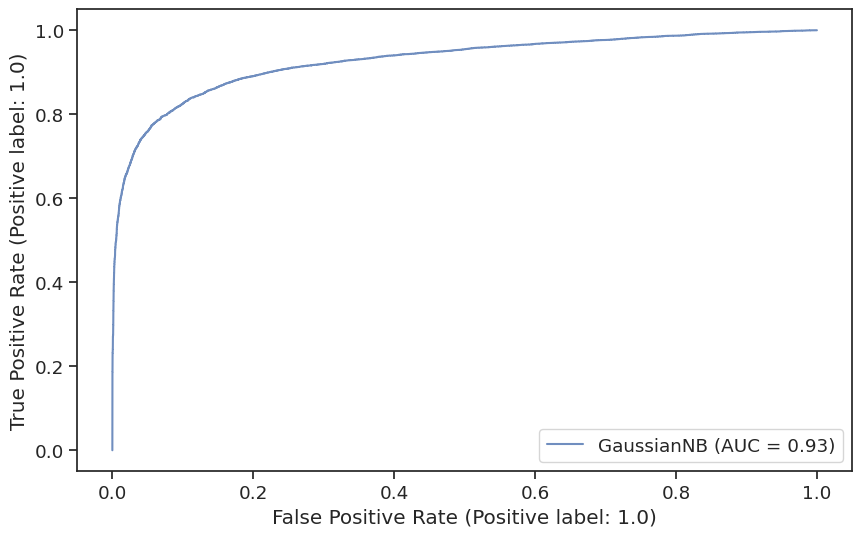

In [ ]:
params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

Logistic Regression

Accuracy = 0.8744347826086957
ROC Area under Curve = 0.8701580805680929
Time taken = 1.6442320346832275
              precision    recall  f1-score   support

         0.0    0.88045   0.90146   0.89083     14705
         1.0    0.86607   0.83885   0.85224     11170

    accuracy                        0.87443     25875
   macro avg    0.87326   0.87016   0.87154     25875
weighted avg    0.87424   0.87443   0.87417     25875



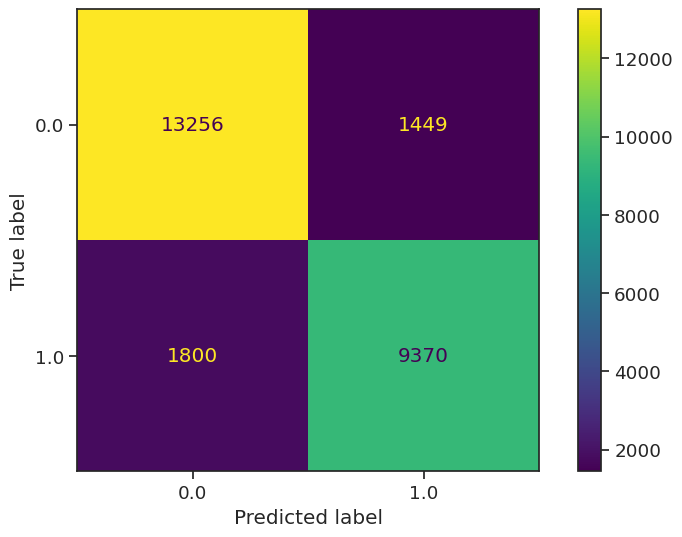

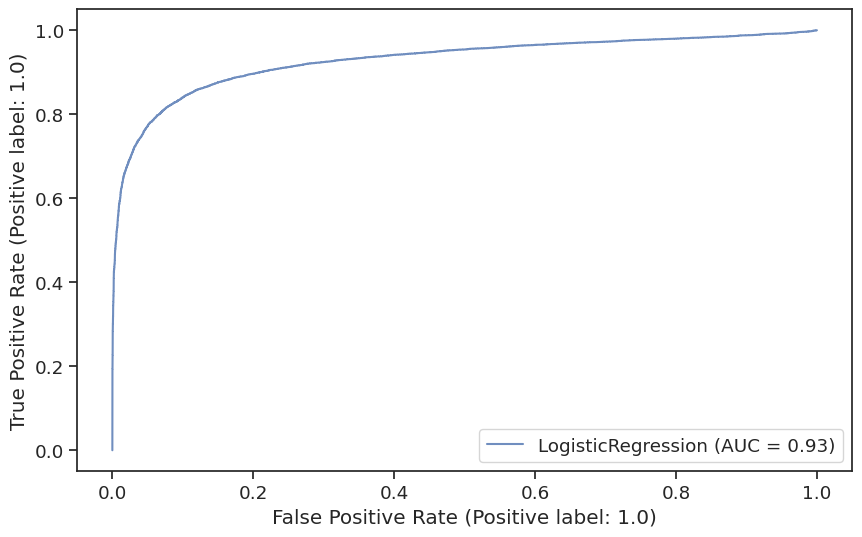

In [ ]:
# Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [ ]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.377042
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           Satisfaction   No. Observations:               103499
Model:                          Logit   Df Residuals:                   103477
Method:                           MLE   Df Model:                           21
Date:                Sat, 03 Aug 2024   Pseudo R-squ.:                  0.4494
Time:                        14:23:38   Log-Likelihood:                -39024.
converged:                       True   LL-Null:                       -70870.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Gender                                    -0.1289   

K-Nearest Neighbor Classifier

Accuracy = 0.9286570048309178
ROC Area under Curve = 0.9220488618753114
Time taken = 38.422279357910156
              precision    recall  f1-score   support

         0.0    0.91002   0.97042   0.93925     14705
         1.0    0.95733   0.87368   0.91359     11170

    accuracy                        0.92866     25875
   macro avg    0.93367   0.92205   0.92642     25875
weighted avg    0.93044   0.92866   0.92817     25875



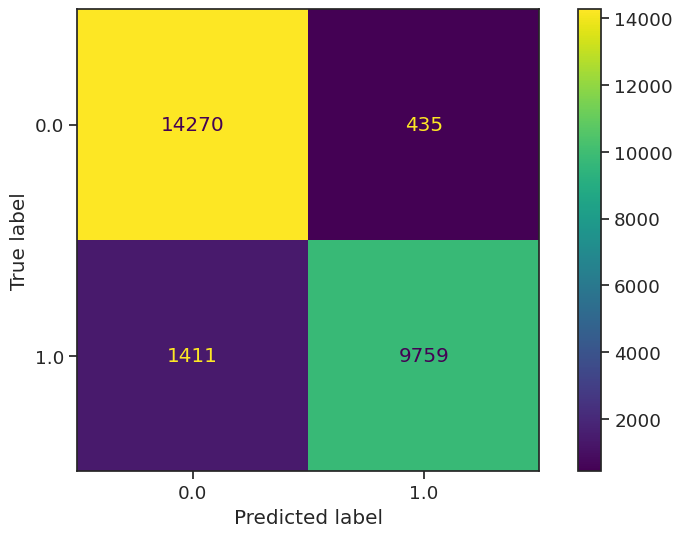

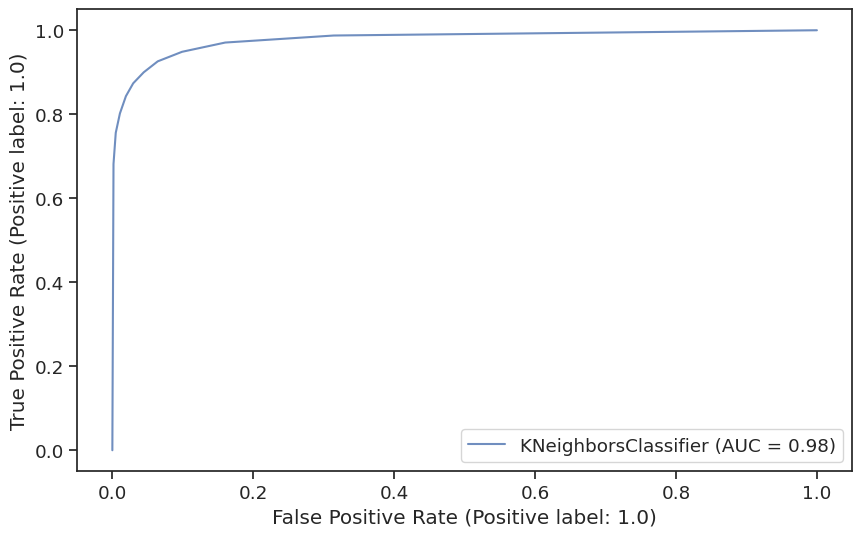

In [ ]:
params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

Decision Tree Classifier

Accuracy = 0.9264154589371981
ROC Area under Curve = 0.9250266734893976
Time taken = 0.1947193145751953
              precision    recall  f1-score   support

         0.0    0.93532   0.93519   0.93526     14705
         1.0    0.91470   0.91486   0.91478     11170

    accuracy                        0.92642     25875
   macro avg    0.92501   0.92503   0.92502     25875
weighted avg    0.92642   0.92642   0.92642     25875



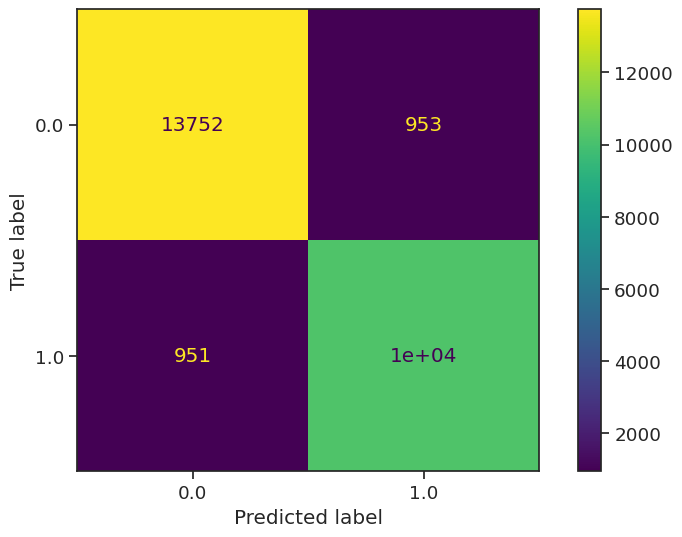

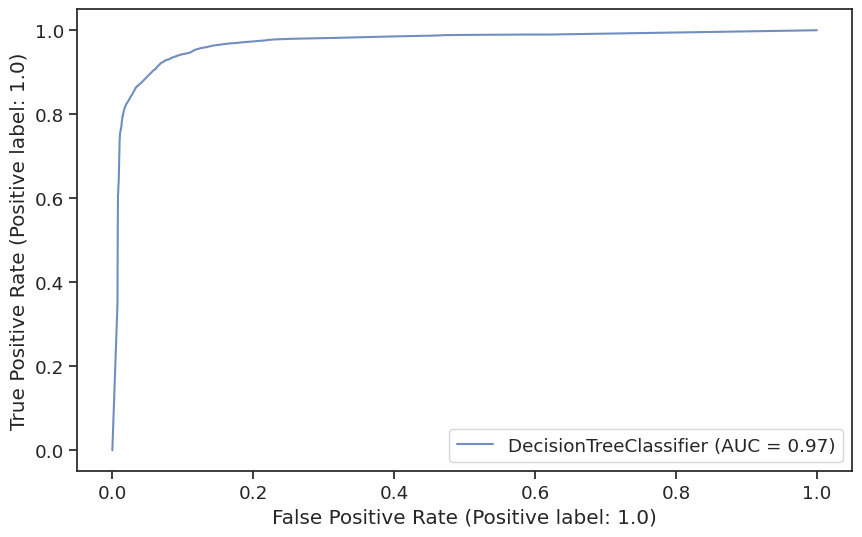

In [ ]:
params_dt = {'max_depth': 12, 'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Random Forest

Accuracy = 0.9603478260869566
ROC Area under Curve = 0.9583884585447552
Time taken = 16.214327335357666
              precision    recall  f1-score   support

         0.0    0.95814   0.97273   0.96538     14705
         1.0    0.96337   0.94405   0.95361     11170

    accuracy                        0.96035     25875
   macro avg    0.96075   0.95839   0.95949     25875
weighted avg    0.96039   0.96035   0.96030     25875



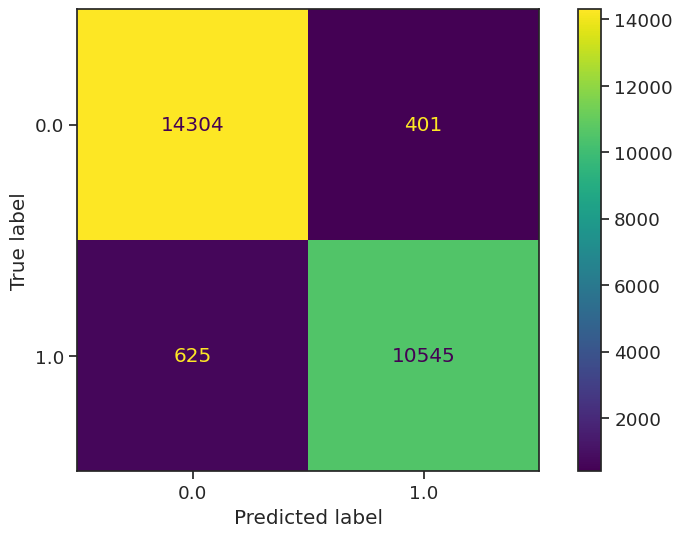

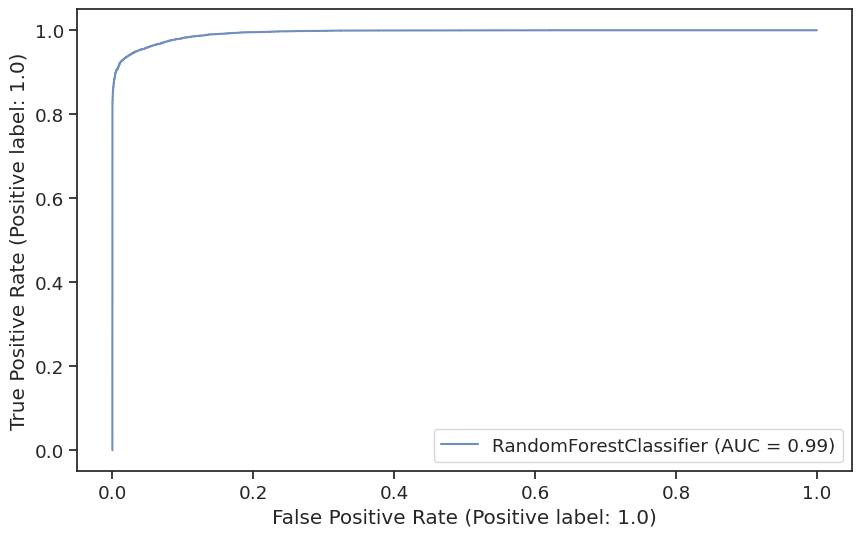

In [ ]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Neural Network

Accuracy = 0.9152077294685991
ROC Area under Curve = 0.9128310062077314
Time taken = 60.75360655784607
              precision    recall  f1-score   support

         0.0    0.92133   0.93023   0.92576     14705
         1.0    0.90696   0.89543   0.90116     11170

    accuracy                        0.91521     25875
   macro avg    0.91415   0.91283   0.91346     25875
weighted avg    0.91513   0.91521   0.91514     25875



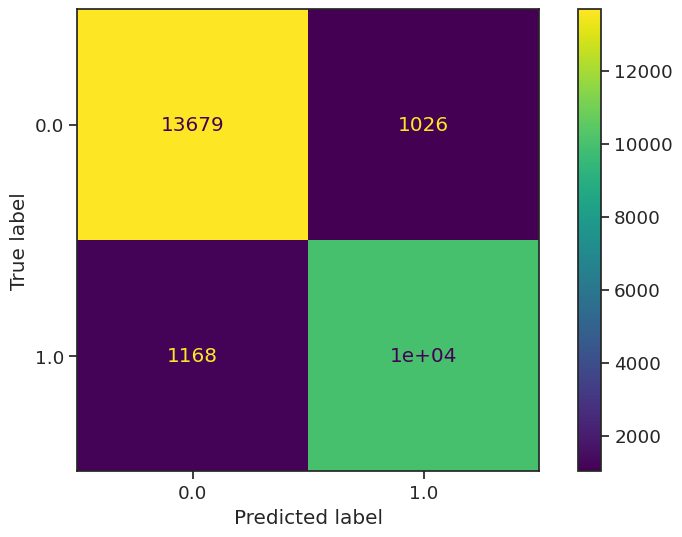

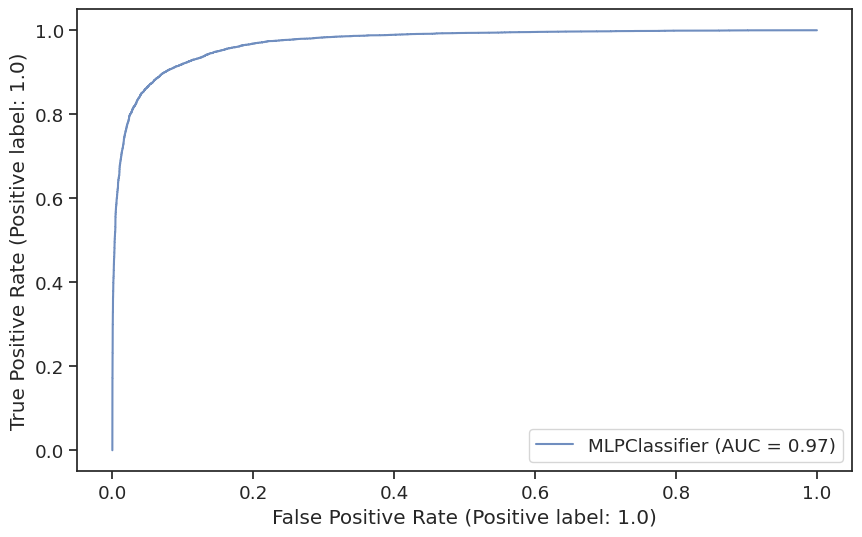

In [ ]:
# Neural Network (Multilayer Perceptron)
params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Linear Support Vector Classifier (Linear SVC)

Accuracy = 0.8763285024154589
ROC Area under Curve = 0.8710709303256494
Time taken = 401.4968783855438
              precision    recall  f1-score   support

         0.0    0.87734   0.90955   0.89316     14705
         1.0    0.87488   0.83259   0.85321     11170

    accuracy                        0.87633     25875
   macro avg    0.87611   0.87107   0.87318     25875
weighted avg    0.87628   0.87633   0.87591     25875



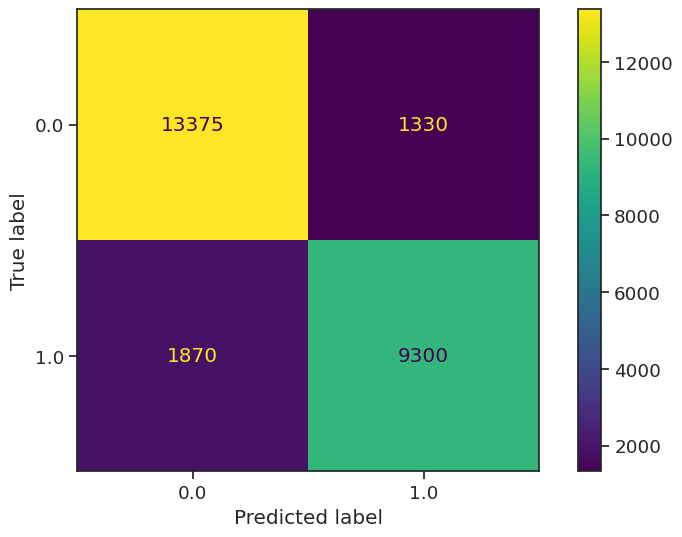

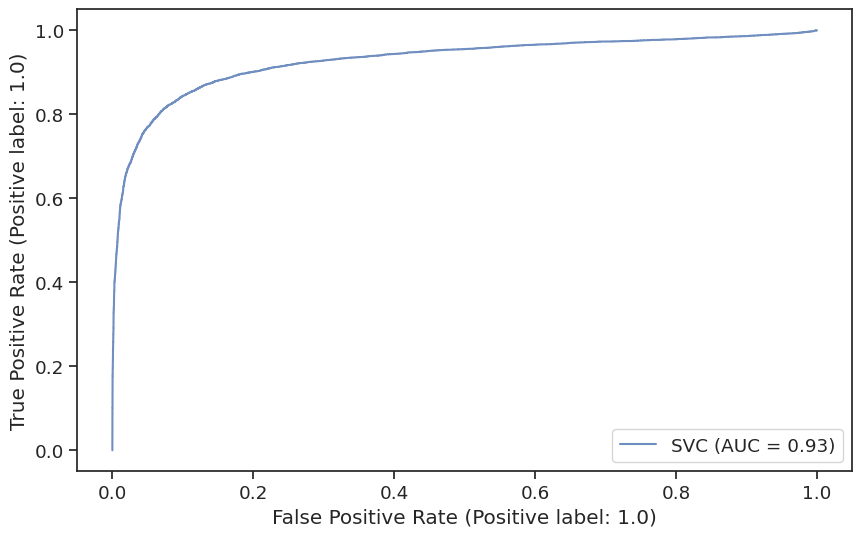

In [ ]:
from sklearn.svm import SVC

# Create a Linear SVC classifier
model_SVC = SVC(kernel='linear', random_state=0)
model_SVC, accuracy_SVC, roc_auc_SVC, tt_SVC = run_model(model_SVC, X_train, y_train, X_test, y_test)

Support Vector Machine

Accuracy = 0.8763285024154589
ROC Area under Curve = 0.8710709303256494
Time taken = 393.5410826206207
              precision    recall  f1-score   support

         0.0    0.87734   0.90955   0.89316     14705
         1.0    0.87488   0.83259   0.85321     11170

    accuracy                        0.87633     25875
   macro avg    0.87611   0.87107   0.87318     25875
weighted avg    0.87628   0.87633   0.87591     25875



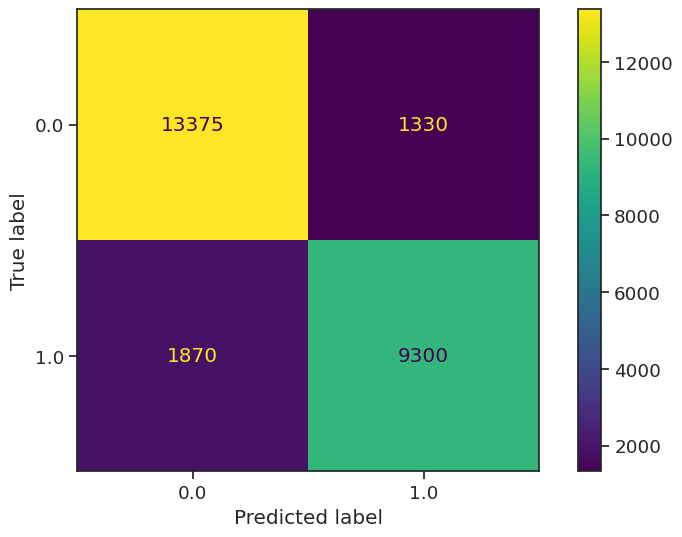

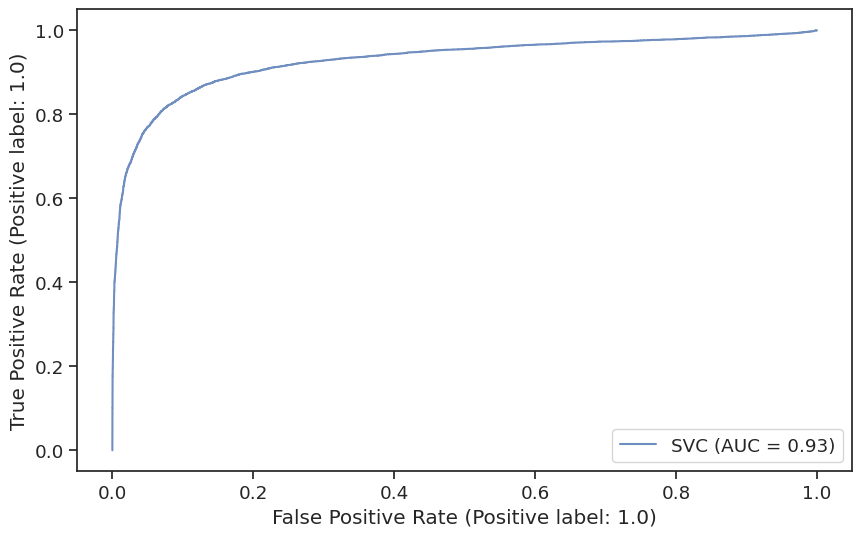

In [ ]:
from sklearn import svm
# Create a Linear SVC classifier
model_svm = svm.SVC(kernel='linear', random_state=0)
model_svm, accuracy_svm, roc_auc_svm, tt_svm = run_model(model_svm, X_train, y_train, X_test, y_test)

Extreme Gradient Boosting

Accuracy = 0.9620096618357488
ROC Area under Curve = 0.9604961893058256
Time taken = 12.30090045928955
              precision    recall  f1-score   support

         0.0    0.96196   0.97157   0.96674     14705
         1.0    0.96208   0.94942   0.95571     11170

    accuracy                        0.96201     25875
   macro avg    0.96202   0.96050   0.96122     25875
weighted avg    0.96201   0.96201   0.96198     25875



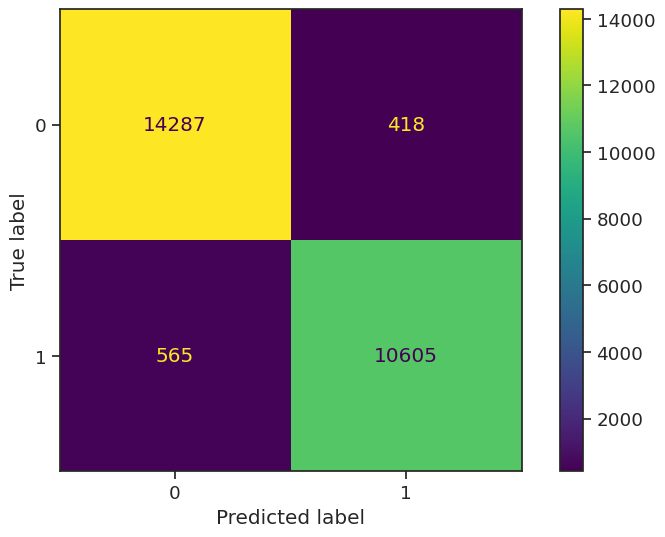

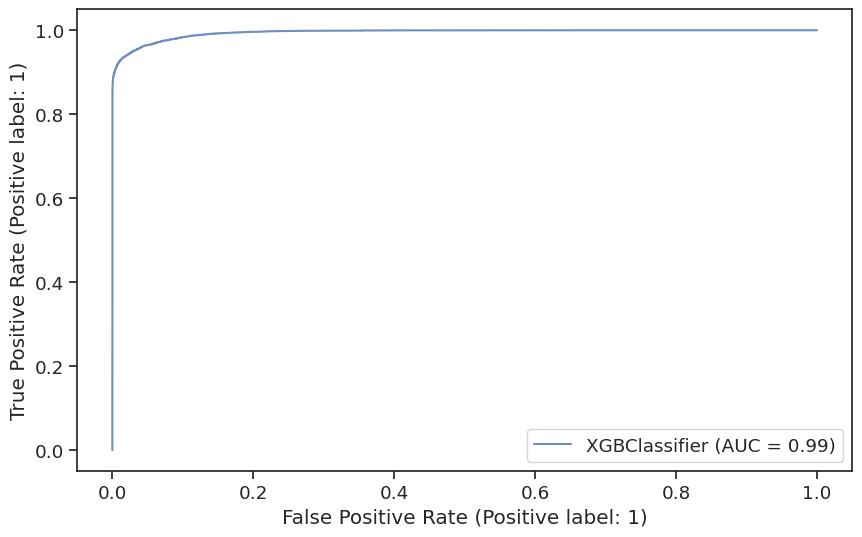

In [ ]:
params_xgb ={'n_estimators': 500,'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

Adaptive Gradient Boosting

Accuracy = 0.9304347826086956
ROC Area under Curve = 0.9290471179389833
Time taken = 55.56019639968872
              precision    recall  f1-score   support

         0.0    0.93844   0.93920   0.93882     14705
         1.0    0.91988   0.91889   0.91938     11170

    accuracy                        0.93043     25875
   macro avg    0.92916   0.92905   0.92910     25875
weighted avg    0.93043   0.93043   0.93043     25875



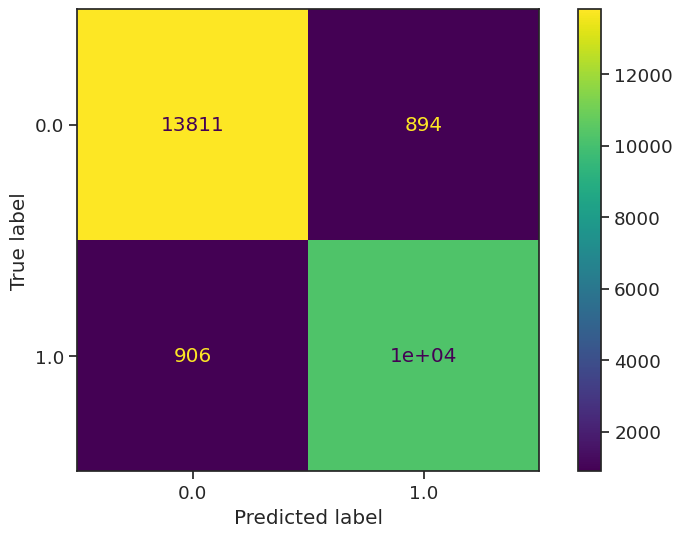

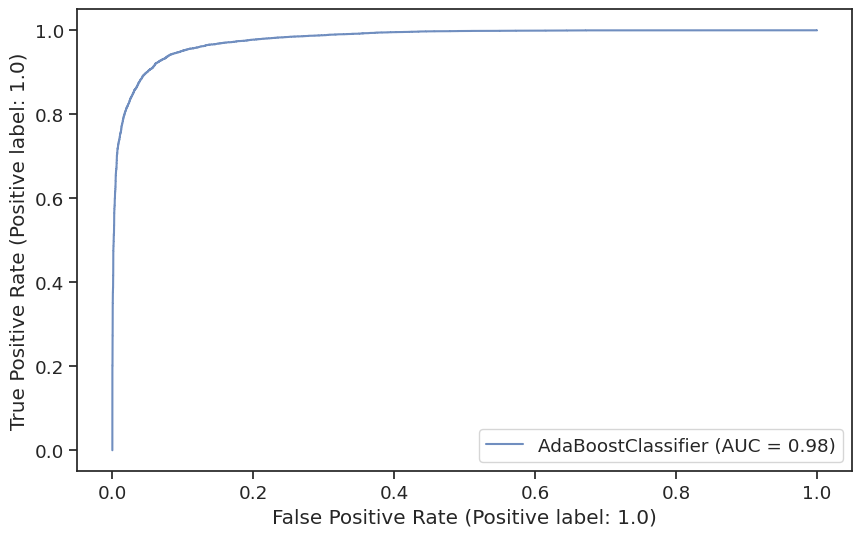

In [ ]:
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = AdaBoostClassifier(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

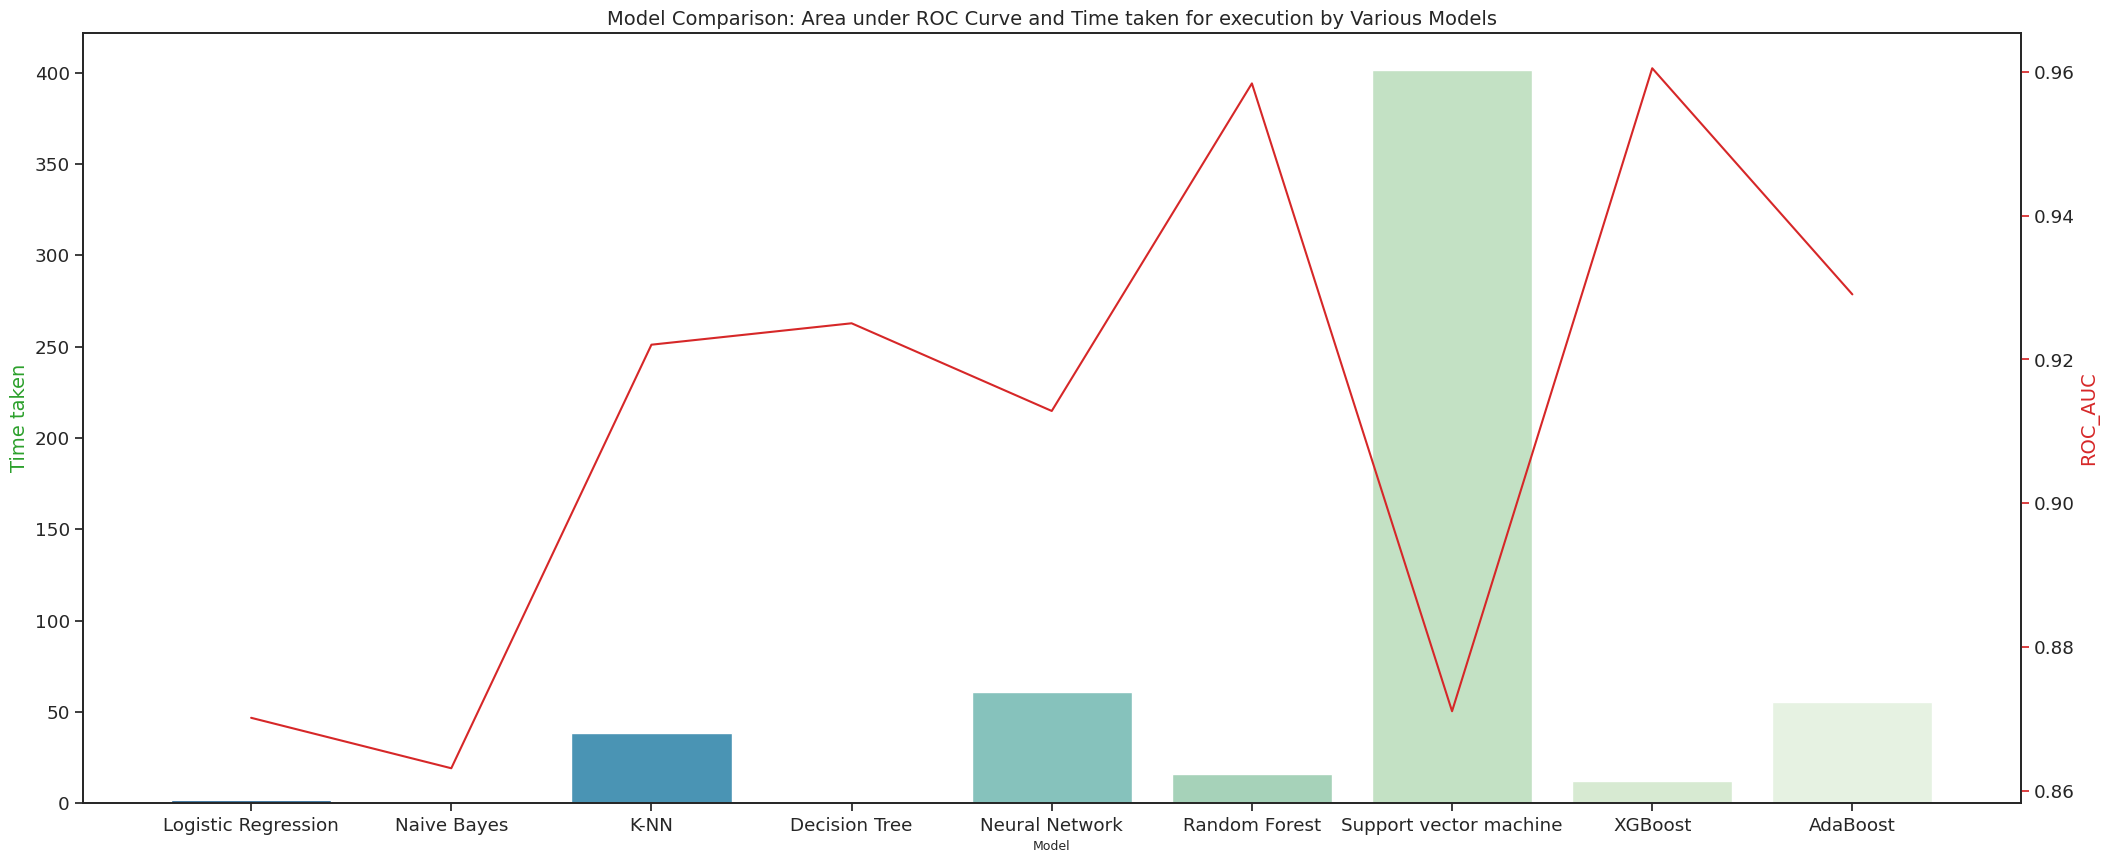

In [ ]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_SVC,roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_SVC, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','Support vector machine','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(25,10))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=14)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=9)
ax1.set_ylabel('Time taken', fontsize=14, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='GnBu_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

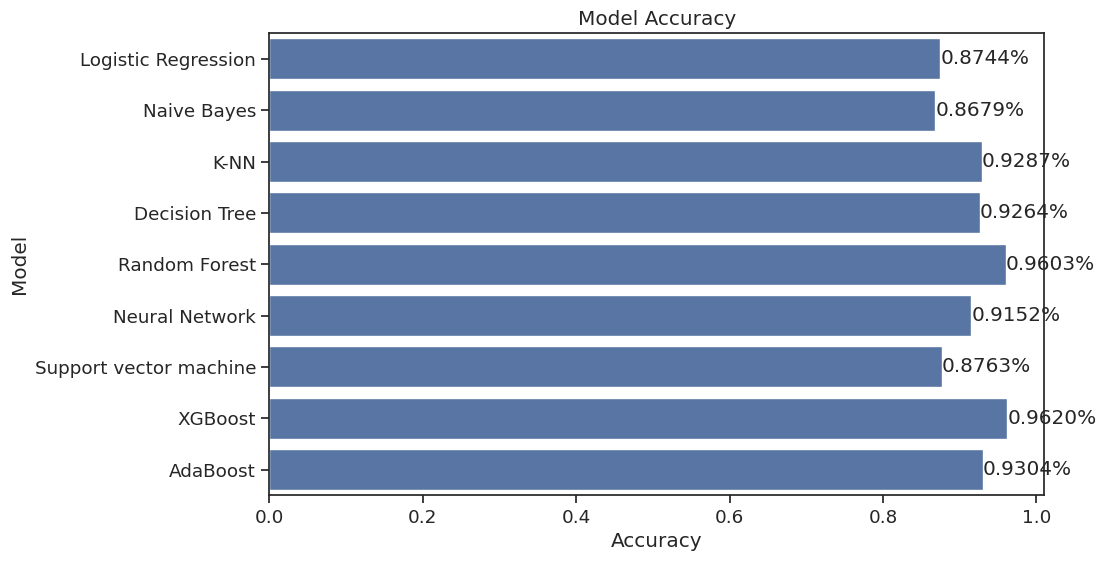

In [ ]:
# Plotting bar graph out of the model scores
accuracy_scores = [accuracy_lr, accuracy_nb, accuracy_kn, accuracy_dt, accuracy_rf,accuracy_nn, accuracy_SVC,accuracy_xgb, accuracy_adab]
model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree',
                        'Random Forest','Neural Network','Support vector machine','XGBoost','AdaBoost'],
              'Accuracy': accuracy_scores}


# Create a DataFrame
df = pd.DataFrame(model_data)

# Plot the bar graph

ax=sns.barplot(x='Accuracy', y='Model', data=df, orient='h', weights=df['Accuracy'])
for index, value in enumerate(df['Accuracy']):
    ax.text(value, index, f'{value:.4f}%', ha='left', va='center')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy')
plt.show()
